# Task-3  


# Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.




# Data Set

This dataset is a Bank Marketing dataset from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)


The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

# Column Description:


age : Integer Age

job : Occupation

marital : Marital Status

education : Education Level

default : has credit in default?

balance : average yearly balance in euros.

housing : has housing loan?

loan : has personal loan?

contact : contact communication type

day_of_week : last contact day of the week

duration : last contact duration, in seconds (numeric)

campaign : number of contacts performed during this campaign and for this client

pdays : number of days that passed by after the client was last contacted from a previous campaign(numeric, -1 means client was not previously contacted)

previous : number of contacts performed before this campaign and for this client

poutcome : outcome of the previous marketing campaign

emp.var.rate: employment variation rate - quarterly indicator (numeric)

cons.price.idx: consumer price index - monthly indicator (numeric)

cons.conf.idx: consumer confidence index - monthly indicator (numeric)

euribor3m: euribor 3 month rate - daily indicator (numeric)

nr.employed: number of employees - quarterly indicator (numeric)

y : has the client subscribed a term deposit? (outcome)

# importing specific liberies of need for the task

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from rich.console import Console
console=Console()

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import plot_tree

In [64]:
df=pd.read_csv("C:\\Users\\NIHARIKA\\Documents\\intern\\taskThree\\bank\\bank-full.csv",sep=';') #loading the data set
df

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

# Data Pre-processing

1. Basic Information and Data Types:

Check the data types of each column and get a summary of the dataframe.


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


2. The size of your dataset before performing further operations or analysis.

In [66]:
df.shape

(45211, 17)

3. Summary Statistics:
    
Understand the distribution of numerical features.

In [67]:
df.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

4. Distribution of Target Variable:
    
Understand the distribution of the target variable ('y').

In [68]:
# Count of each class in the target variable
print(df['y'].value_counts())

y
no     39922
yes     5289
Name: count, dtype: int64


5. Handling Missing Values:
    
Check for missing values and decide how to handle them (imputation or removal).

In [69]:
# Check for missing values
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


6. Checking for Duplicates

In [70]:
print(df.duplicated())
print(df.duplicated().sum())# sum of Duplicates

0        False
1        False
2        False
3        False
4        False
         ...  
45206    False
45207    False
45208    False
45209    False
45210    False
Length: 45211, dtype: bool
0


Sine There is no duplicate vales in the data set then we can do further step.

In case any duplicates present then we have to check them and handel.

# Handling Duplicates

In [71]:
# Remove duplicates
df_unique = df.drop_duplicates()

# Display the dataframe without duplicates
df_unique


age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

7. Exploring Categorical Variables:
    
Analyze categorical variables and their unique values.

In [72]:
# Example: Unique values in a categorical column
console.print("Education:-")
console.print(df['education'].unique())
console.print(df['education'].value_counts())
console.print("Job:-")
console.print(df['job'].unique())
console.print(df['job'].value_counts())# Frequency counts for categorical columns

Education:-

['tertiary' 'secondary' 'unknown' 'primary']

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

Job:-

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

# Handling the Target Variable:

Convert the target variable ('y') into a binary format (0 or 1).

In [73]:
df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [74]:
df

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  y  
0        unknown    5   may       261         1     -1         0  unknown  0  
1        unknown    5   may       151         1     -1         0  unknown  0  
2        unknown    5   may        76         1     -1         0  unknown  0  
3        unknown    5   may        92         1     -1         0  unknown  0  
4        unknown    5   may       198         1     -1         0  unknown  0  
...          ...  ...   ...       ...       ...    ...       ...      ... ..  
45206   cellular   17   nov       977         3     -1         0  unknown  1  
45207   cellular   17   nov       456         2     -1         0  unknown  1  
45208   cellular   17   nov      1127         5    184         3  success  1  
45209  telephone   17   nov       508         4     -1         0  unknown  0  
45210   cellular   17   nov       361         2    188        11    other  0  

[45211 rows x 17 columns]

# Distribution of Numerical Variables

For numerical variables, such as 'age', 'balance', 'duration', 'campaign', 'pdays', and 'previous', you can visualize their distributions using histograms or density plots. 

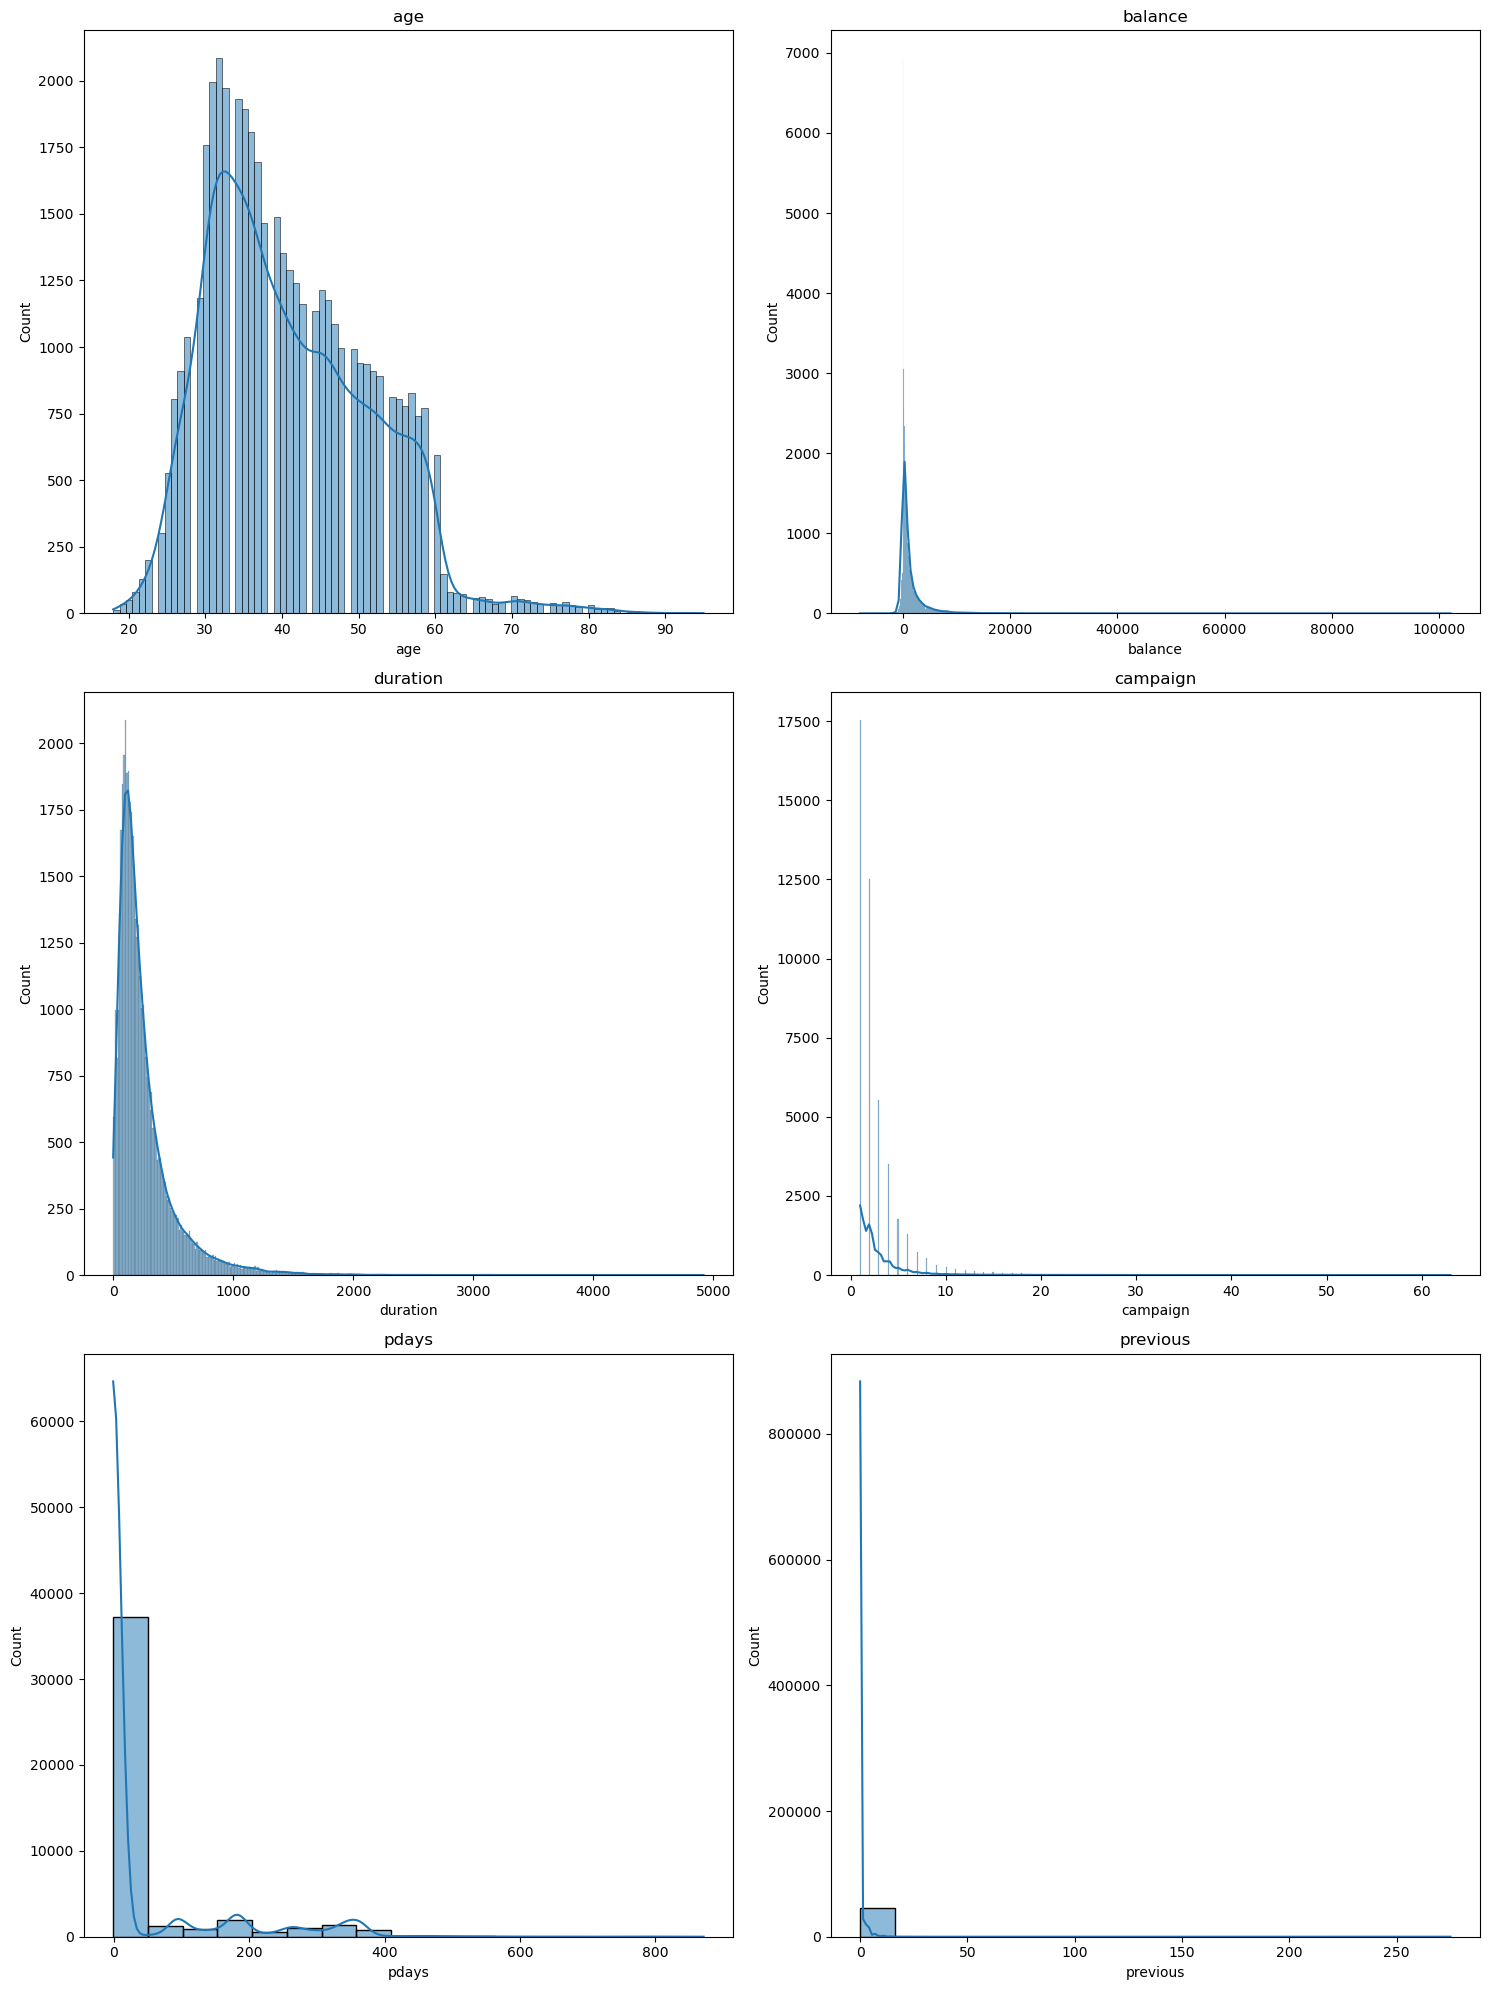

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Plot histograms for numerical variables
plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


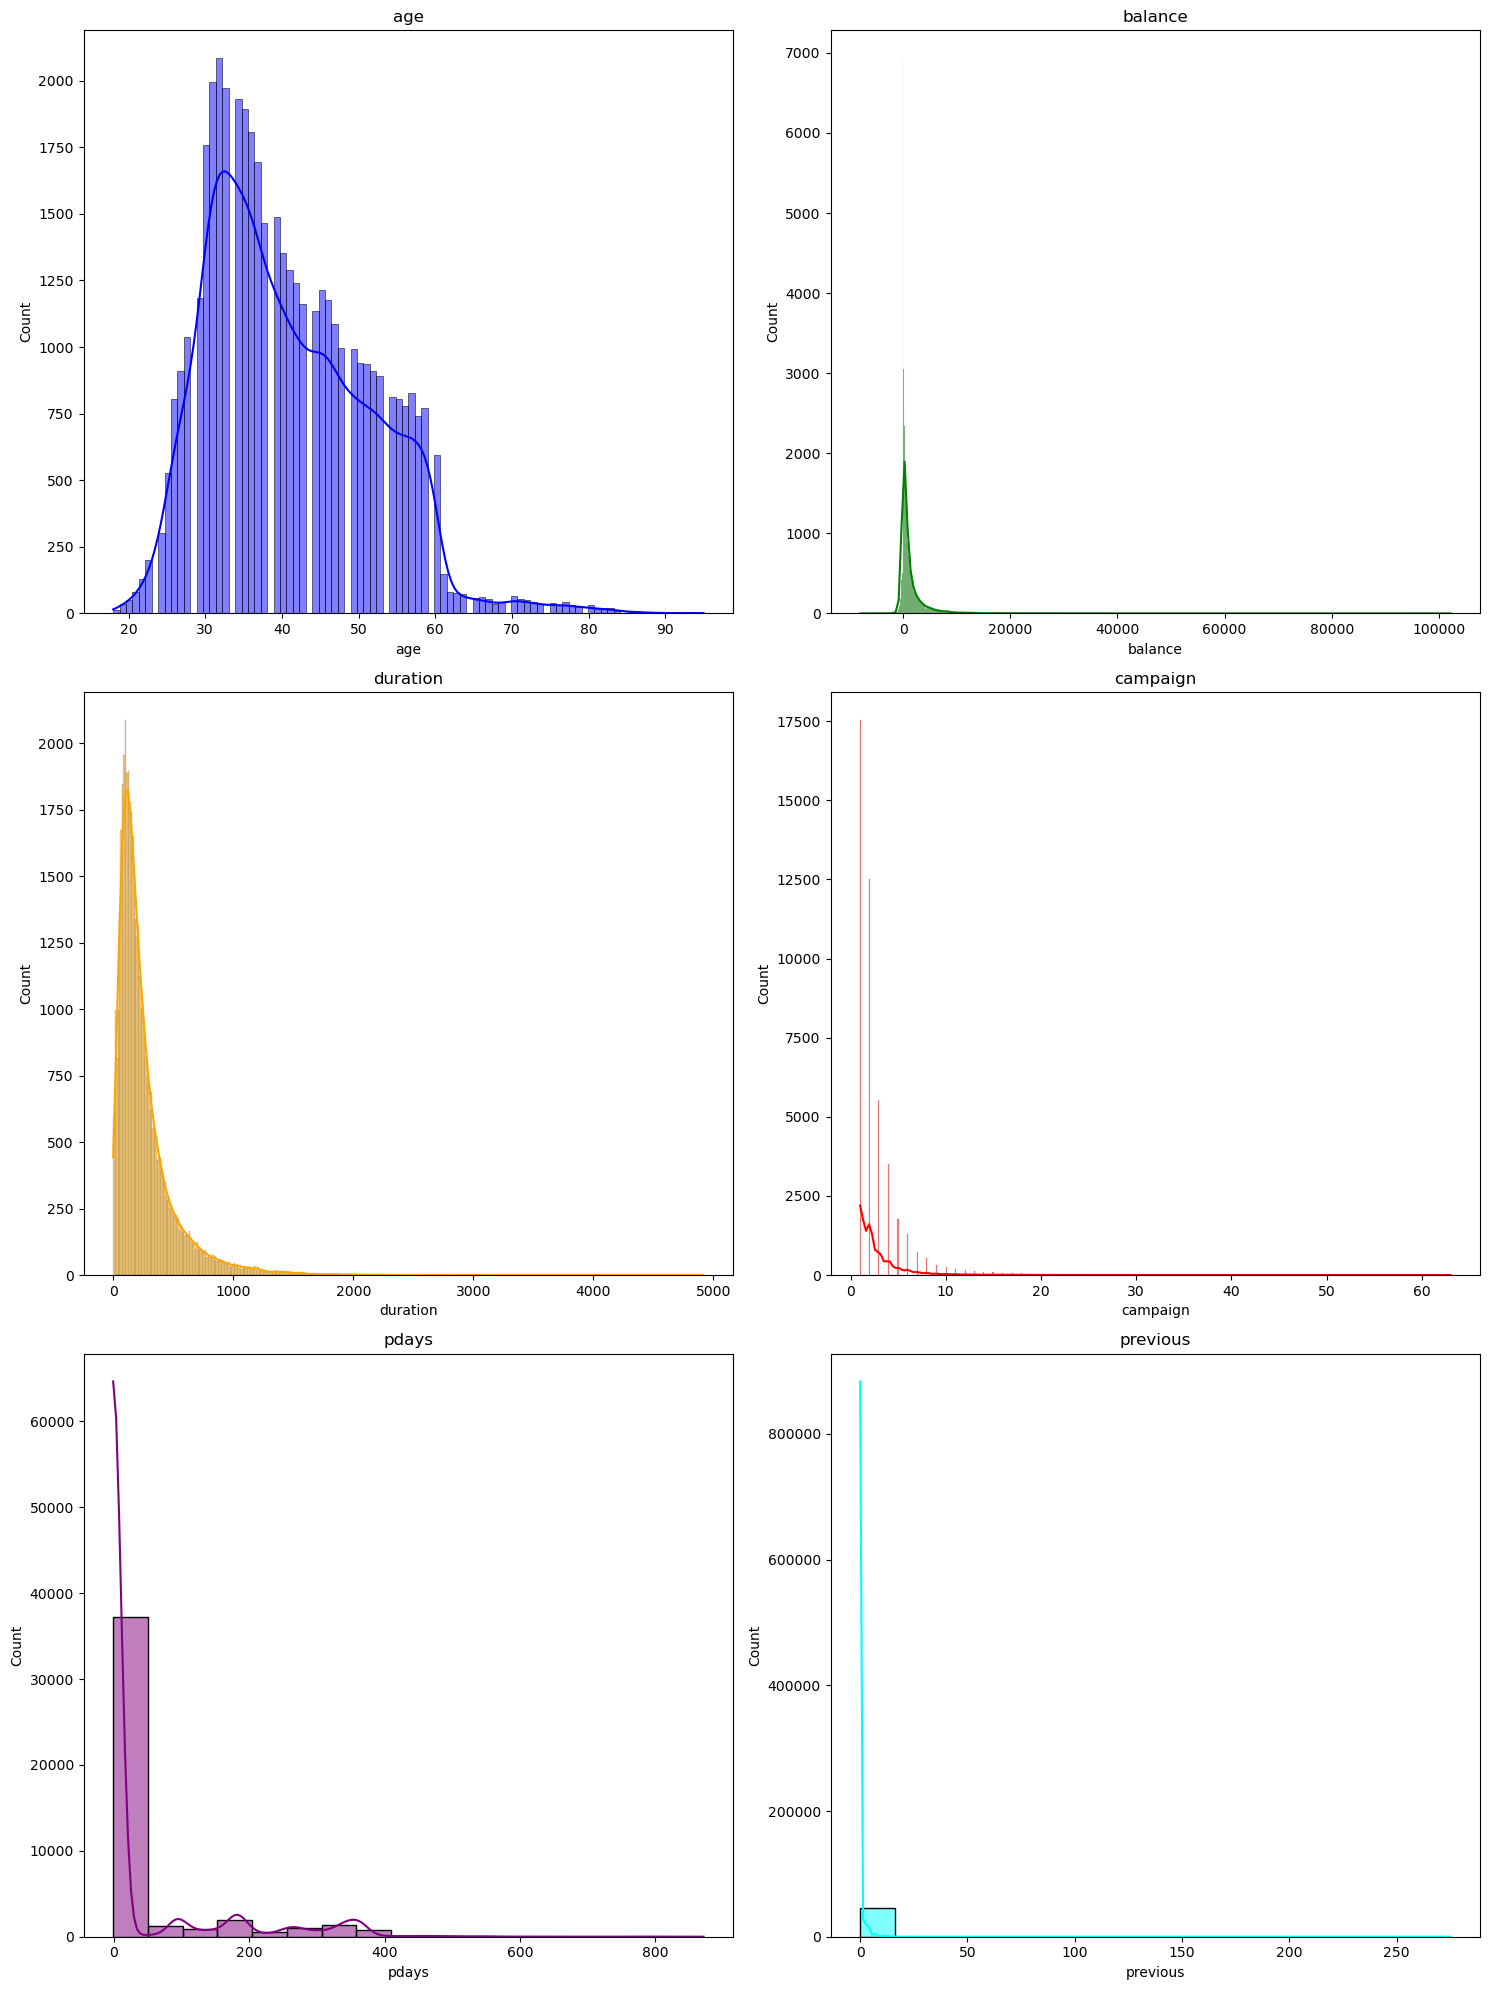

In [76]:
# Select numerical columns
numerical_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Define colors for each variable (optional: you can choose any colors you prefer)
colors = ['blue', 'green', 'orange', 'red', 'purple', 'cyan']

# Plot histograms for numerical variables
plt.figure(figsize=(15, 20))
for i, (col, color) in enumerate(zip(numerical_cols, colors), 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True, color=color)
    plt.title(col)
plt.tight_layout()
plt.show()

# Correlation Analysis: Calculate and visualize correlations between numerical features.

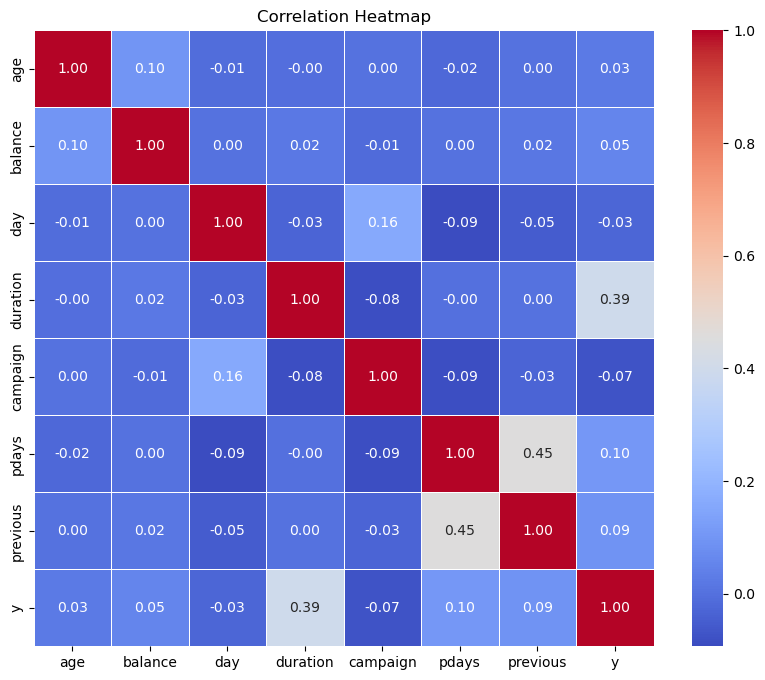

In [77]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Heatmap showing the correlation coefficients between the numerical features. 

Each cell in the heatmap will display the correlation value, helping to understand the linear relationships between features.

# Categorical Variables

For categorical variables, such as 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day', 'month', and 'poutcome', we can visualize.

Each categorical feature, showing the distribution of each category within those features.

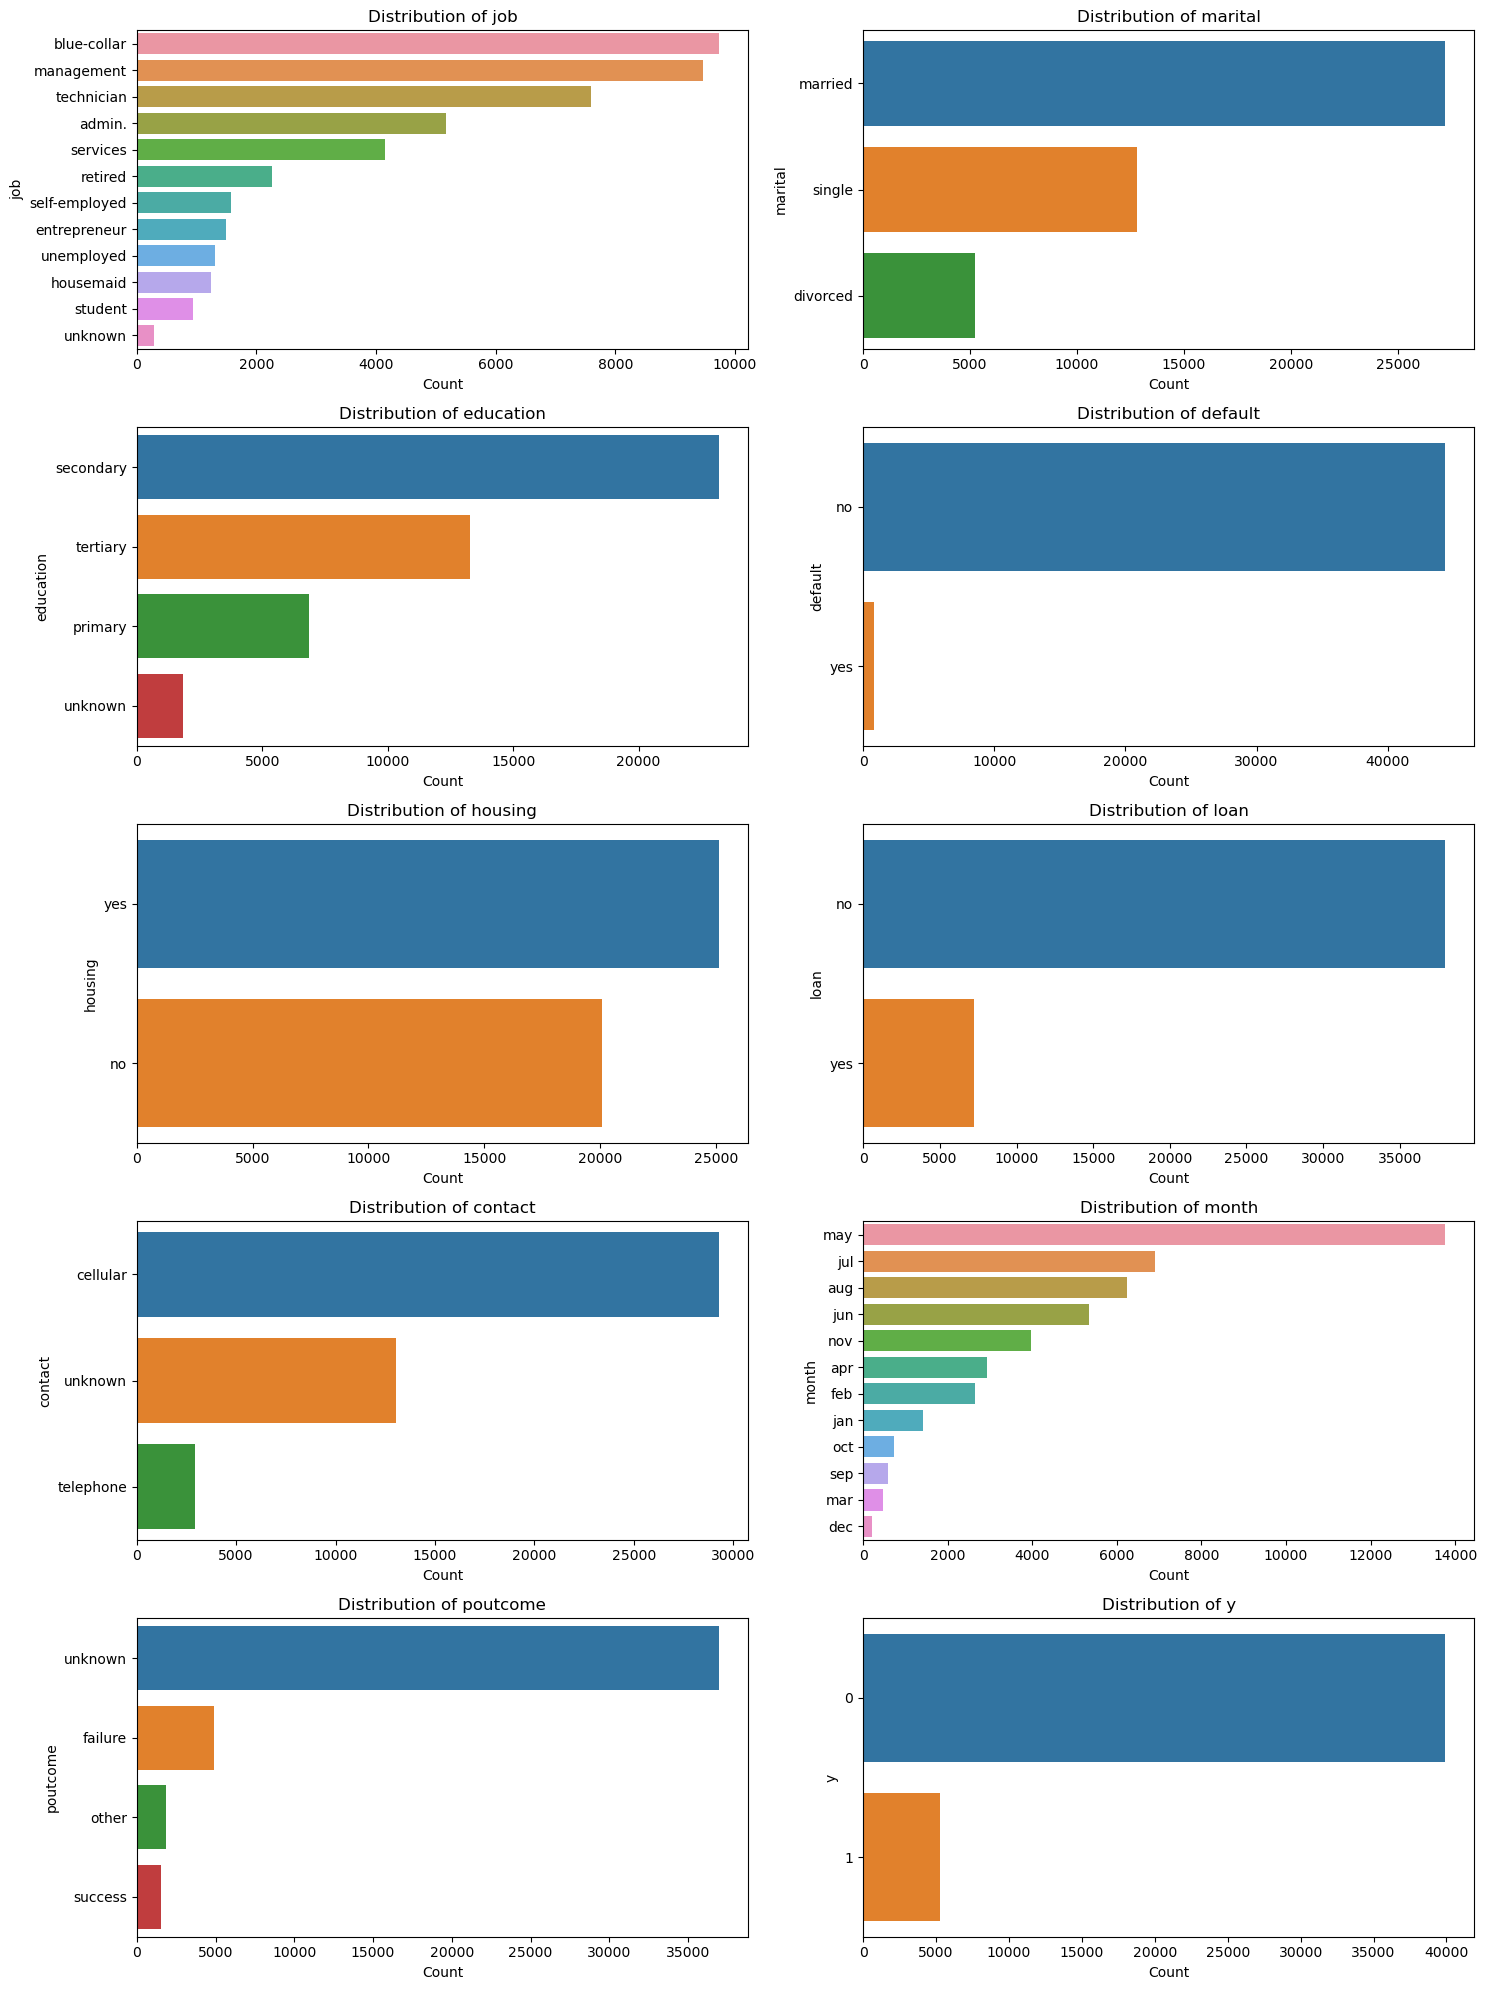

In [78]:
# List of categorical features
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

# Plot bar plots for each categorical feature
plt.figure(figsize=(15, 20))
for i, feature in enumerate(categorical_features):
    plt.subplot(5, 2, i + 1)
    sns.countplot(y=df[feature], order=df[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Count')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

# Pivot Tables

Creating pivot tables can help explore the relationships between categorical features and the target variable.

In [79]:
# List of categorical features (excluding the target variable 'y')
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Create pivot tables for each categorical feature against the target variable 'y'
for feature in categorical_features:
    pivot_table = pd.pivot_table(df, values='age', index=feature, columns='y', aggfunc='count', fill_value=0)
    print(f'Pivot Table for {feature} vs y:')
    print(pivot_table)
    print('\n')

Pivot Table for job vs y:
y                 0     1
job                      
admin.         4540   631
blue-collar    9024   708
entrepreneur   1364   123
housemaid      1131   109
management     8157  1301
retired        1748   516
self-employed  1392   187
services       3785   369
student         669   269
technician     6757   840
unemployed     1101   202
unknown         254    34


Pivot Table for marital vs y:
y             0     1
marital              
divorced   4585   622
married   24459  2755
single    10878  1912


Pivot Table for education vs y:
y              0     1
education             
primary     6260   591
secondary  20752  2450
tertiary   11305  1996
unknown     1605   252


Pivot Table for default vs y:
y            0     1
default             
no       39159  5237
yes        763    52


Pivot Table for housing vs y:
y            0     1
housing             
no       16727  3354
yes      23195  1935


Pivot Table for loan vs y:
y         0     1
loan             

# Features

Aggregation Features: 
    
    Aggregate features such as the sum, mean, or count for certain groups.

In [80]:
features_to_aggregate = ['balance', 'duration', 'campaign', 'previous']

# Define aggregation functions
agg_functions = {
    'balance': ['sum', 'mean', 'count'],
    'duration': ['sum', 'mean', 'count'],
    'campaign': ['sum', 'mean', 'count'],
    'previous': ['sum', 'mean', 'count']
}

# Perform aggregation for each categorical feature
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

for feature in categorical_features:
    aggregated_data = df.groupby(feature).agg(agg_functions)
    aggregated_data.columns = ['_'.join(col).strip() for col in aggregated_data.columns.values]  # Flatten the MultiIndex columns
    print(f'Aggregated Data for {feature}:')
    display(aggregated_data)
    print('\n')

Aggregated Data for job:


balance_sum  balance_mean  balance_count  duration_sum  \
job                                                                     
admin.             5873423   1135.838909           5171       1276703   
blue-collar       10499141   1078.826654           9732       2558558   
entrepreneur       2262426   1521.470074           1487        381132   
housemaid          1726570   1392.395161           1240        304823   
management        16680288   1763.616832           9458       2402292   
retired            4492263   1984.215106           2264        650586   
self-employed      2602146   1647.970868           1579        423420   
services           4141904    997.088108           4154       1077210   
student            1302001   1388.060768            938        231364   
technician         9516246   1252.632092           7597       1921319   
unemployed         1982835   1521.745971           1303        375972   
unknown             510439   1772.357639            288         68432   

               duration_mean  duration_count  campaign_sum  campaign_mean  \
job                                                                         
admin.            246.896732            5171         13317       2.575324   
blue-collar       262.901562            9732         27415       2.816995   
entrepreneur      256.309348            1487          4163       2.799597   
housemaid         245.825000            1240          3498       2.820968   
management        253.995771            9458         27091       2.864348   
retired           287.361307            2264          5313       2.346731   
self-employed     268.157061            1579          4505       2.853072   
services          259.318729            4154         11292       2.718344   
student           246.656716             938          2157       2.299574   
technician        252.904962            7597         22083       2.906805   
unemployed        288.543361            1303          3169       2.432080   
unknown           237.611111             288           953       3.309028   

               campaign_count  previous_sum  previous_mean  previous_count  
job                                                                         
admin.                   5171          3473       0.671630            5171  
blue-collar              9732          4916       0.505138            9732  
entrepreneur             1487           711       0.478144            1487  
housemaid                1240           461       0.371774            1240  
management               9458          6318       0.668006            9458  
retired                  2264          1446       0.638693            2264  
self-employed            1579           871       0.551615            1579  
services                 4154          2082       0.501204            4154  
student                   938           894       0.953092             938  
technician               7597          4365       0.574569            7597  
unemployed               1303           608       0.466616            1303  
unknown                   288            92       0.319444             288



Aggregated Data for marital:


balance_sum  balance_mean  balance_count  duration_sum  \
marital                                                            
divorced      6138388   1178.872287           5207       1366927   
married      38805139   1425.925590          27214       6896375   
single       16646155   1301.497654          12790       3408509   

          duration_mean  duration_count  campaign_sum  campaign_mean  \
marital                                                                
divorced     262.517188            5207         13699       2.630882   
married      253.412765           27214         77366       2.842875   
single       266.497967           12790         33891       2.649805   

          campaign_count  previous_sum  previous_mean  previous_count  
marital                                                                
divorced            5207          2871       0.551373            5207  
married            27214         15146       0.556552           27214  
single             12790          8220       0.642690           12790



Aggregated Data for education:


balance_sum  balance_mean  balance_count  duration_sum  \
education                                                           
primary        8570258   1250.949934           6851       1753397   
secondary     26795544   1154.880786          23202       6002027   
tertiary      23388697   1758.416435          13301       3438555   
unknown        2835183   1526.754443           1857        477832   

           duration_mean  duration_count  campaign_sum  campaign_mean  \
education                                                               
primary       255.933002            6851         19418       2.834331   
secondary     258.685760           23202         62664       2.700802   
tertiary      258.518532           13301         37583       2.825577   
unknown       257.313947            1857          5291       2.849219   

           campaign_count  previous_sum  previous_mean  previous_count  
education                                                               
primary              6851          3352       0.489272            6851  
secondary           23202         13173       0.567753           23202  
tertiary            13301          8805       0.661980           13301  
unknown              1857           907       0.488422            1857



Aggregated Data for default:


balance_sum  balance_mean  balance_count  duration_sum  \
default                                                           
no          61701846   1389.806424          44396      11476932   
yes          -112164   -137.624540            815        194879   

         duration_mean  duration_count  campaign_sum  campaign_mean  \
default                                                               
no          258.512749           44396        122390       2.756780   
yes         239.115337             815          2566       3.148466   

         campaign_count  previous_sum  previous_mean  previous_count  
default                                                               
no                44396         26018       0.586044           44396  
yes                 815           219       0.268712             815



Aggregated Data for housing:


balance_sum  balance_mean  balance_count  duration_sum  \
housing                                                           
no          32059342   1596.501270          20081       5154811   
yes         29530340   1175.103064          25130       6517000   

         duration_mean  duration_count  campaign_sum  campaign_mean  \
housing                                                               
no          256.700911           20081         57143       2.845625   
yes         259.331476           25130         67813       2.698488   

         campaign_count  previous_sum  previous_mean  previous_count  
housing                                                               
no                20081          9735       0.484787           20081  
yes               25130         16502       0.656665           25130



Aggregated Data for loan:


balance_sum  balance_mean  balance_count  duration_sum  duration_mean  \
loan                                                                          
no       55980581   1474.453631          37967       9854687     259.559275   
yes       5609101    774.309912           7244       1817124     250.845389   

      duration_count  campaign_sum  campaign_mean  campaign_count  \
loan                                                                
no             37967        104422       2.750336           37967   
yes             7244         20534       2.834622            7244   

      previous_sum  previous_mean  previous_count  
loan                                               
no           22455       0.591435           37967  
yes           3782       0.522087            7244



Aggregated Data for contact:


balance_sum  balance_mean  balance_count  duration_sum  \
contact                                                             
cellular      40938292   1397.926993          29285       7702364   
telephone      5241564   1803.704061           2906        683974   
unknown       15409826   1183.550384          13020       3285473   

           duration_mean  duration_count  campaign_sum  campaign_mean  \
contact                                                                 
cellular      263.013966           29285         78780       2.690114   
telephone     235.366139            2906          9883       3.400895   
unknown       252.340476           13020         36293       2.787481   

           campaign_count  previous_sum  previous_mean  previous_count  
contact                                                                 
cellular            29285         23547       0.804064           29285  
telephone            2906          2404       0.827254            2906  
unknown             13020           286       0.021966           13020



Aggregated Data for month:


balance_sum  balance_mean  balance_count  duration_sum  duration_mean  \
month                                                                          
apr        4522760   1542.551160           2932        874026     298.098909   
aug        8918853   1427.701777           6247       1451816     232.402113   
dec         495554   2315.672897            214         70476     329.327103   
feb        3494293   1319.098905           2649        657742     248.298226   
jan        1328337    946.783321           1403        376313     268.220242   
jul        6205676    900.025526           6895       1847690     267.975344   
jun        8589515   1608.222243           5341       1298332     243.087811   
mar         976051   2046.228512            477        116579     244.400419   
may       14247708   1034.992590          13766       3591856     260.922272   
nov        9976344   2512.932997           3970       1005000     253.148615   
oct        1706530   2312.371274            738        212767     288.302168   
sep        1128061   1948.291883            579        169214     292.252159   

       duration_count  campaign_sum  campaign_mean  campaign_count  \
month                                                                
apr              2932          5733       1.955321            2932   
aug              6247         24534       3.927325            6247   
dec               214           470       2.196262             214   
feb              2649          6310       2.382031            2649   
jan              1403          2346       1.672131            1403   
jul              6895         24301       3.524438            6895   
jun              5341         16746       3.135368            5341   
mar               477          1052       2.205451             477   
may             13766         33693       2.447552           13766   
nov              3970          7615       1.918136            3970   
oct               738          1134       1.536585             738   
sep               579          1022       1.765112             579   

       previous_sum  previous_mean  previous_count  
month                                               
apr            3086       1.052524            2932  
aug            1739       0.278374            6247  
dec             386       1.803738             214  
feb            3133       1.182710            2649  
jan            1663       1.185317            1403  
jul             896       0.129949            6895  
jun            1057       0.197903            5341  
mar             567       1.188679             477  
may            8053       0.584992           13766  
nov            3420       0.861461            3970  
oct            1140       1.544715             738  
sep            1097       1.894646             579



Aggregated Data for poutcome:


balance_sum  balance_mean  balance_count  duration_sum  \
poutcome                                                           
failure       7183913   1465.805550           4901       1196755   
other         2736837   1487.411413           1840        470516   
success       2930284   1939.301125           1511        478789   
unknown      48738648   1318.722043          36959       9525751   

          duration_mean  duration_count  campaign_sum  campaign_mean  \
poutcome                                                               
failure      244.185880            4901          9708       1.980820   
other        255.715217            1840          4529       2.461413   
success      316.868961            1511          2729       1.806089   
unknown      257.738332           36959        107990       2.921886   

          campaign_count  previous_sum  previous_mean  previous_count  
poutcome                                                               
failure             4901         14196       2.896552            4901  
other               1840          7377       4.009239            1840  
success             1511          4647       3.075447            1511  
unknown            36959            17       0.000460           36959

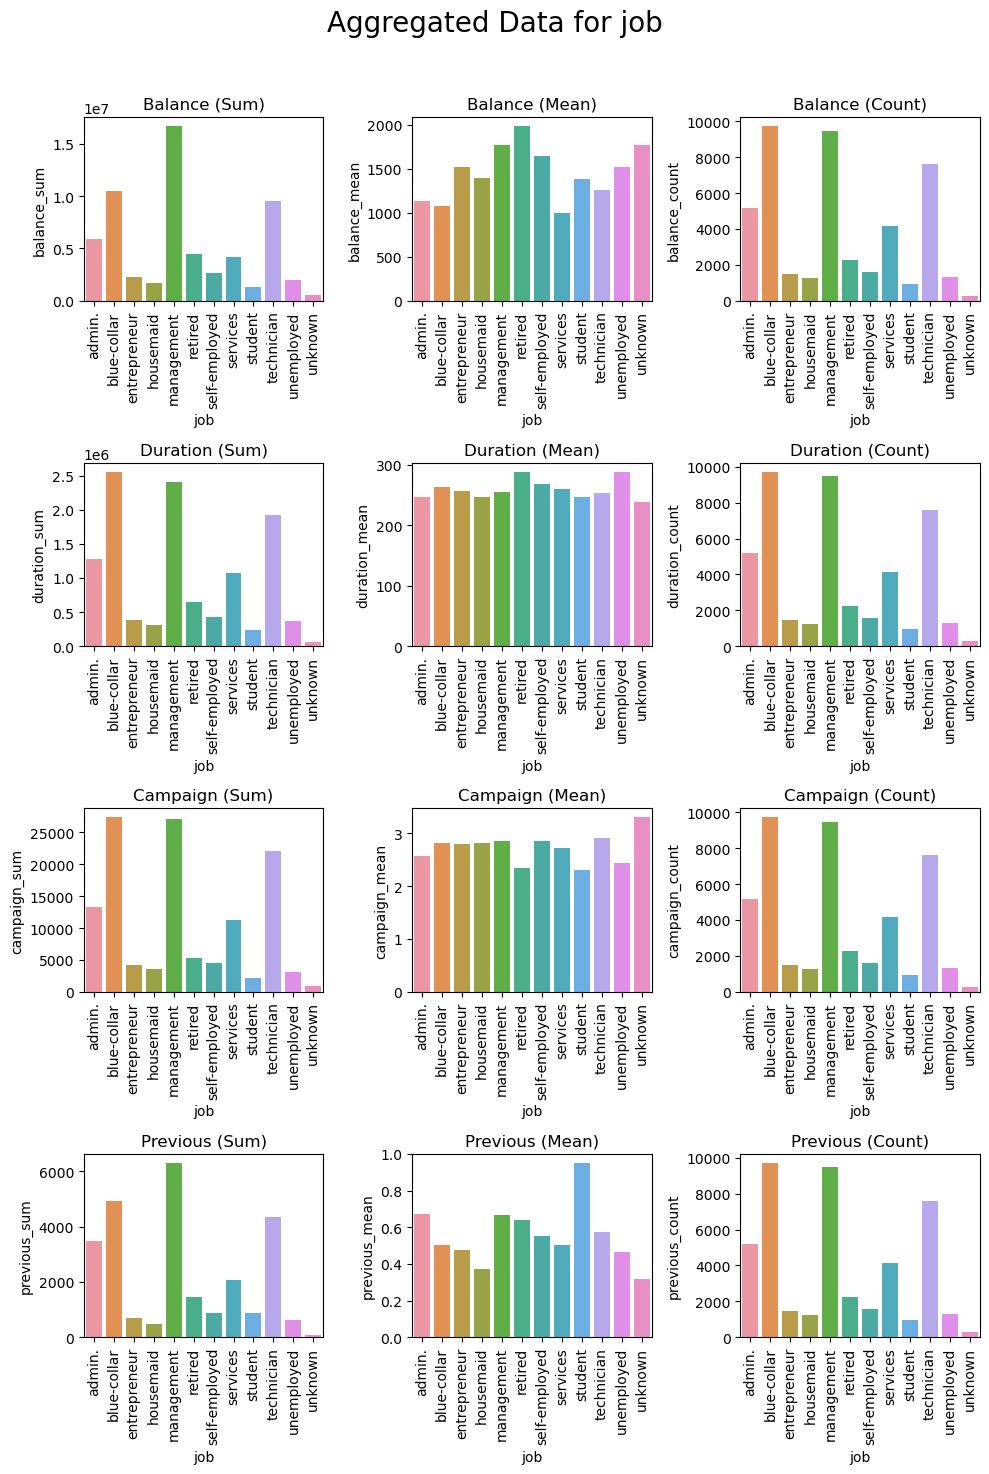

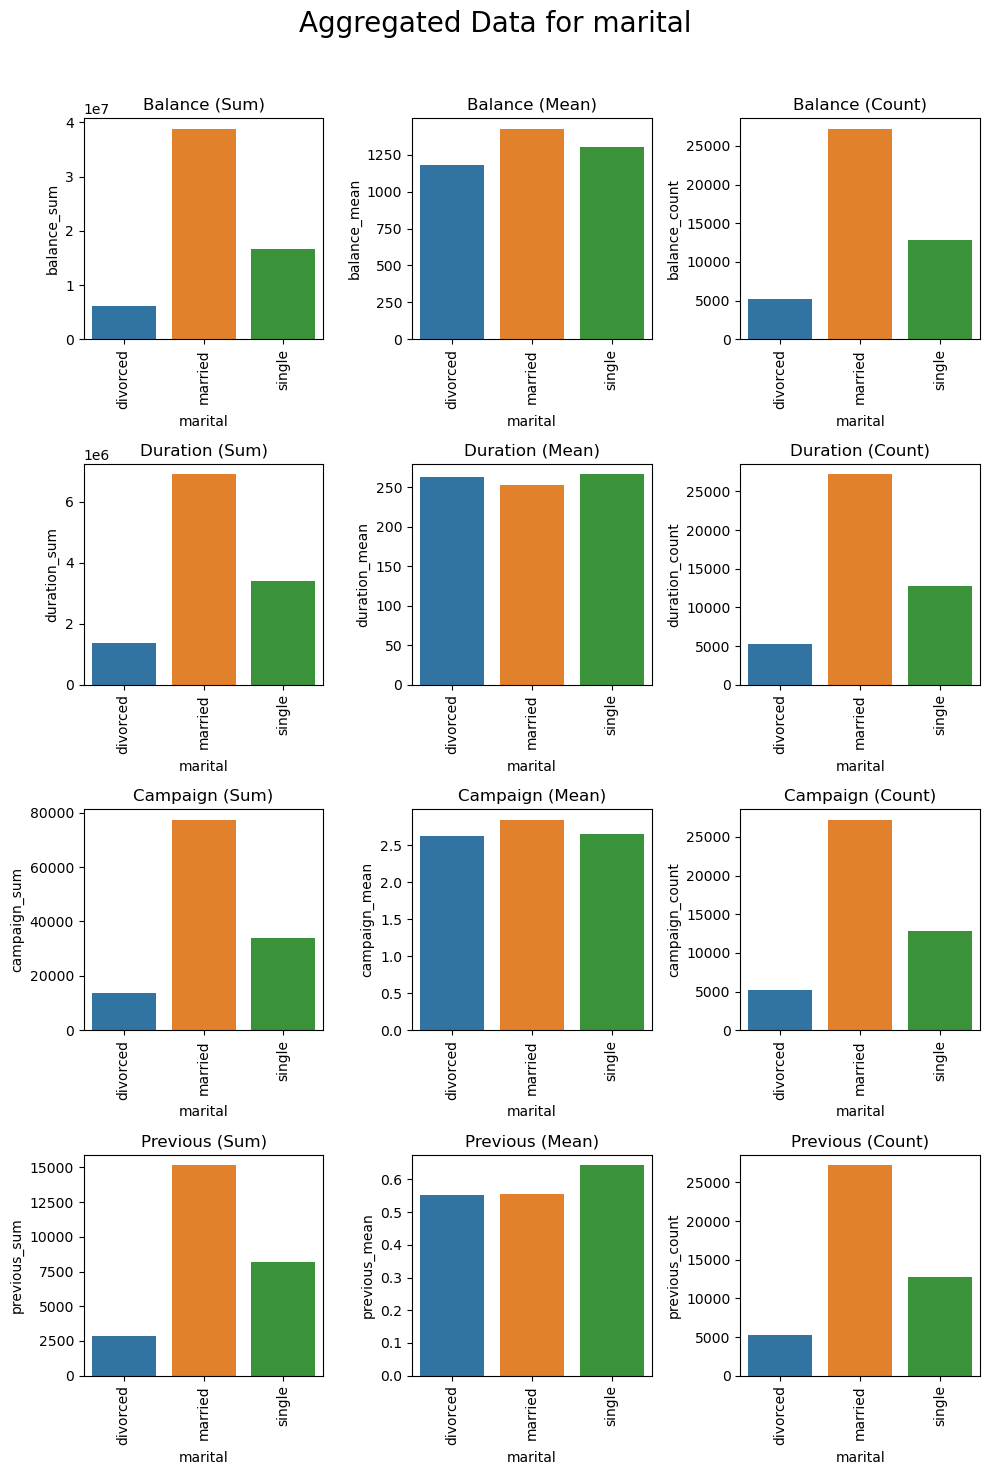

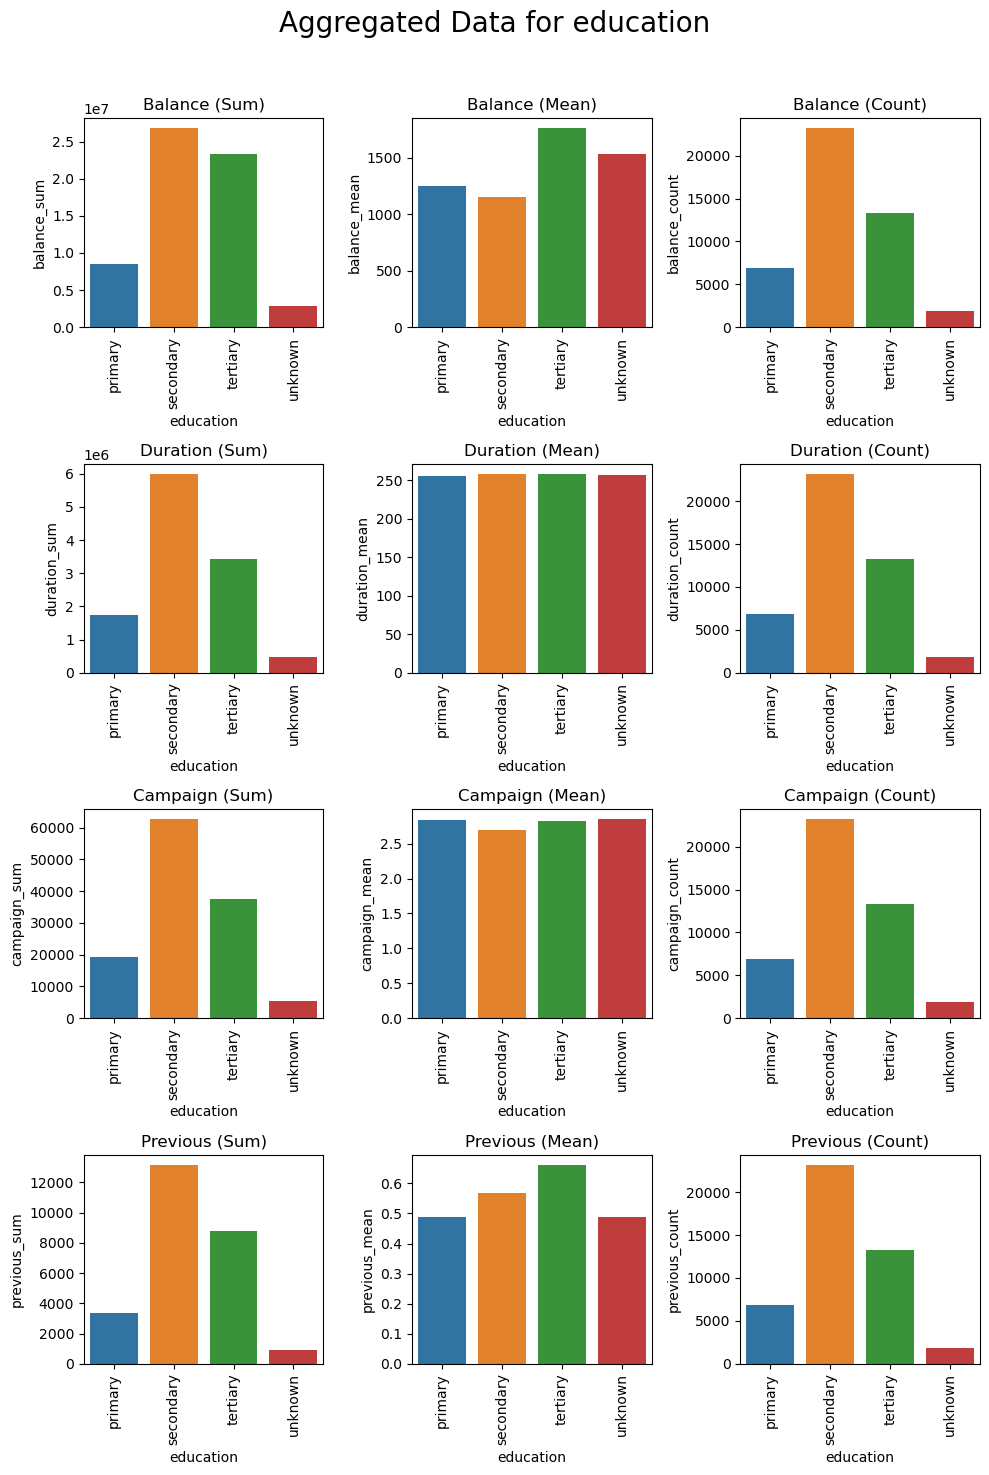

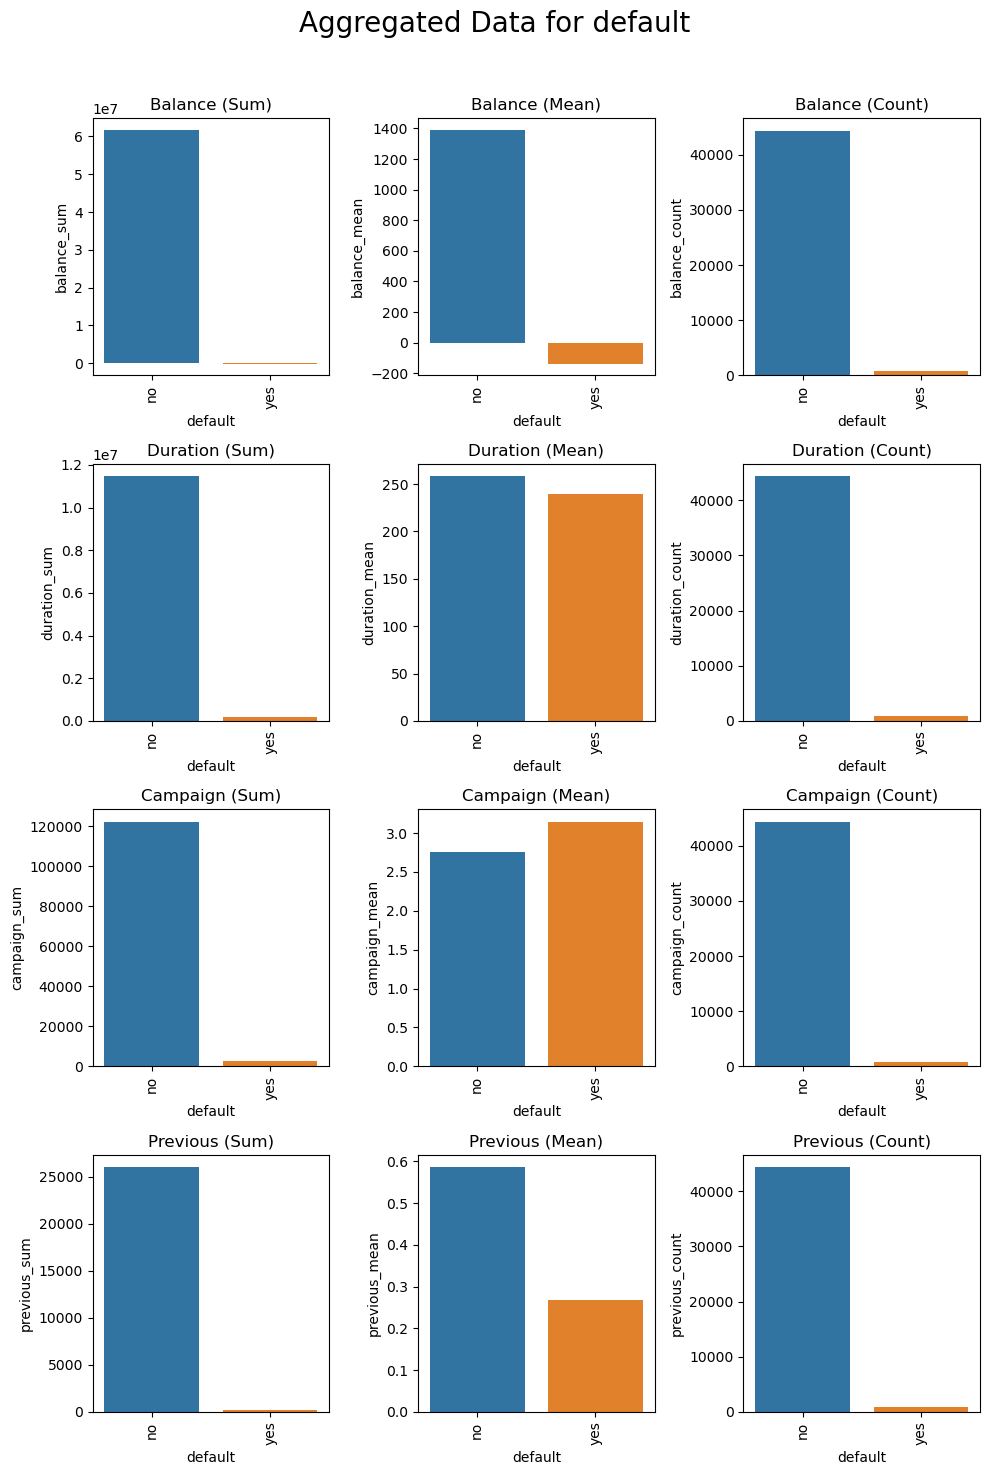

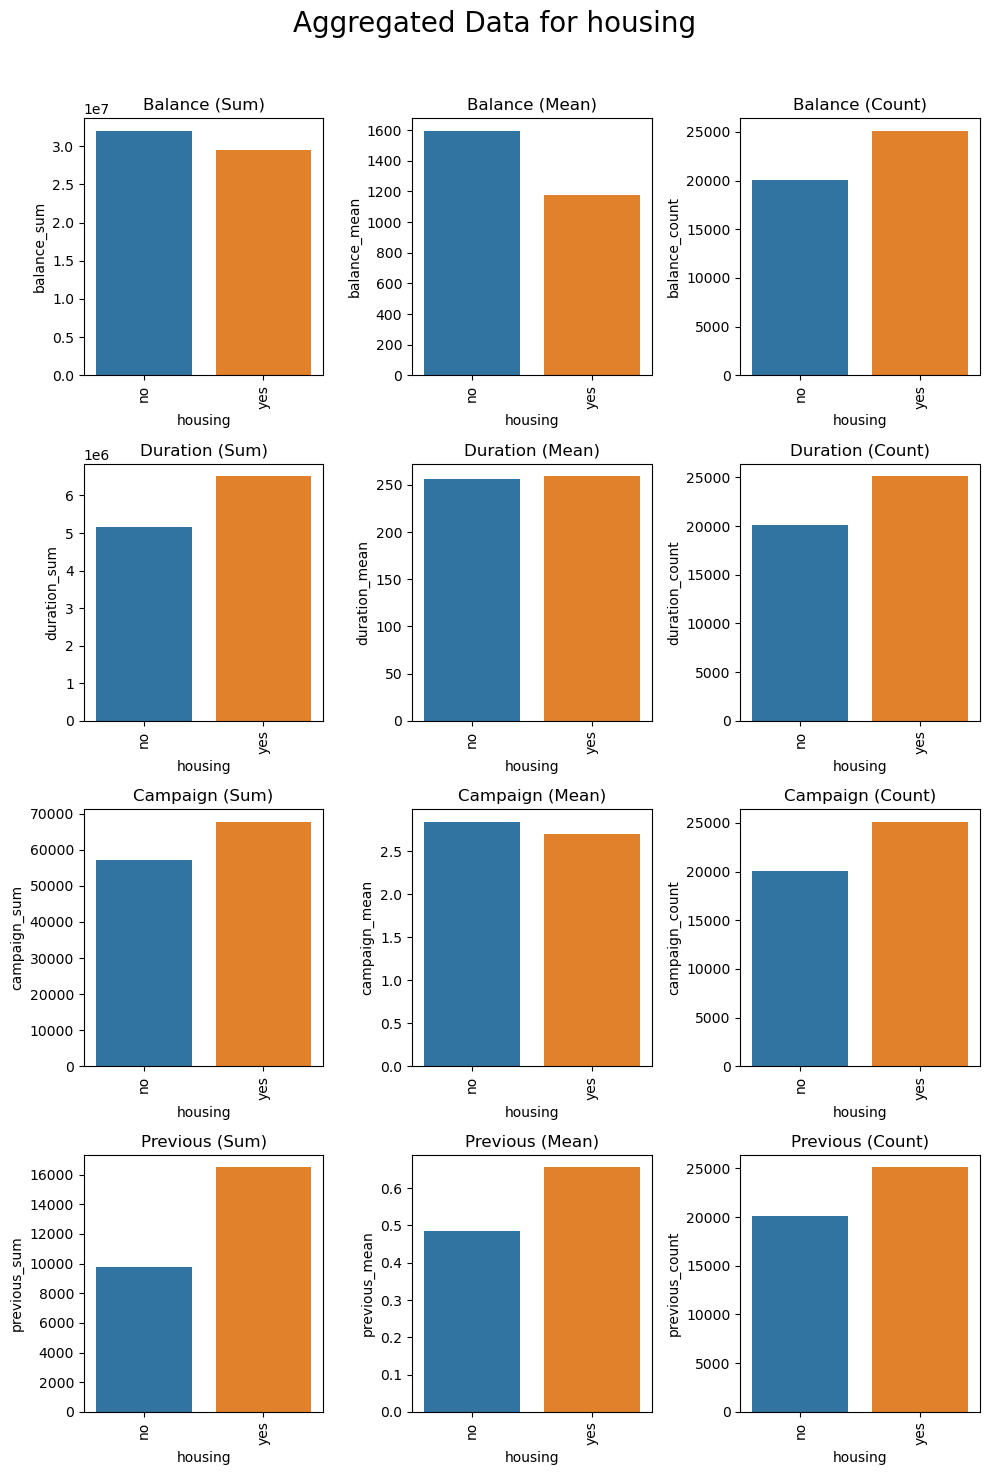

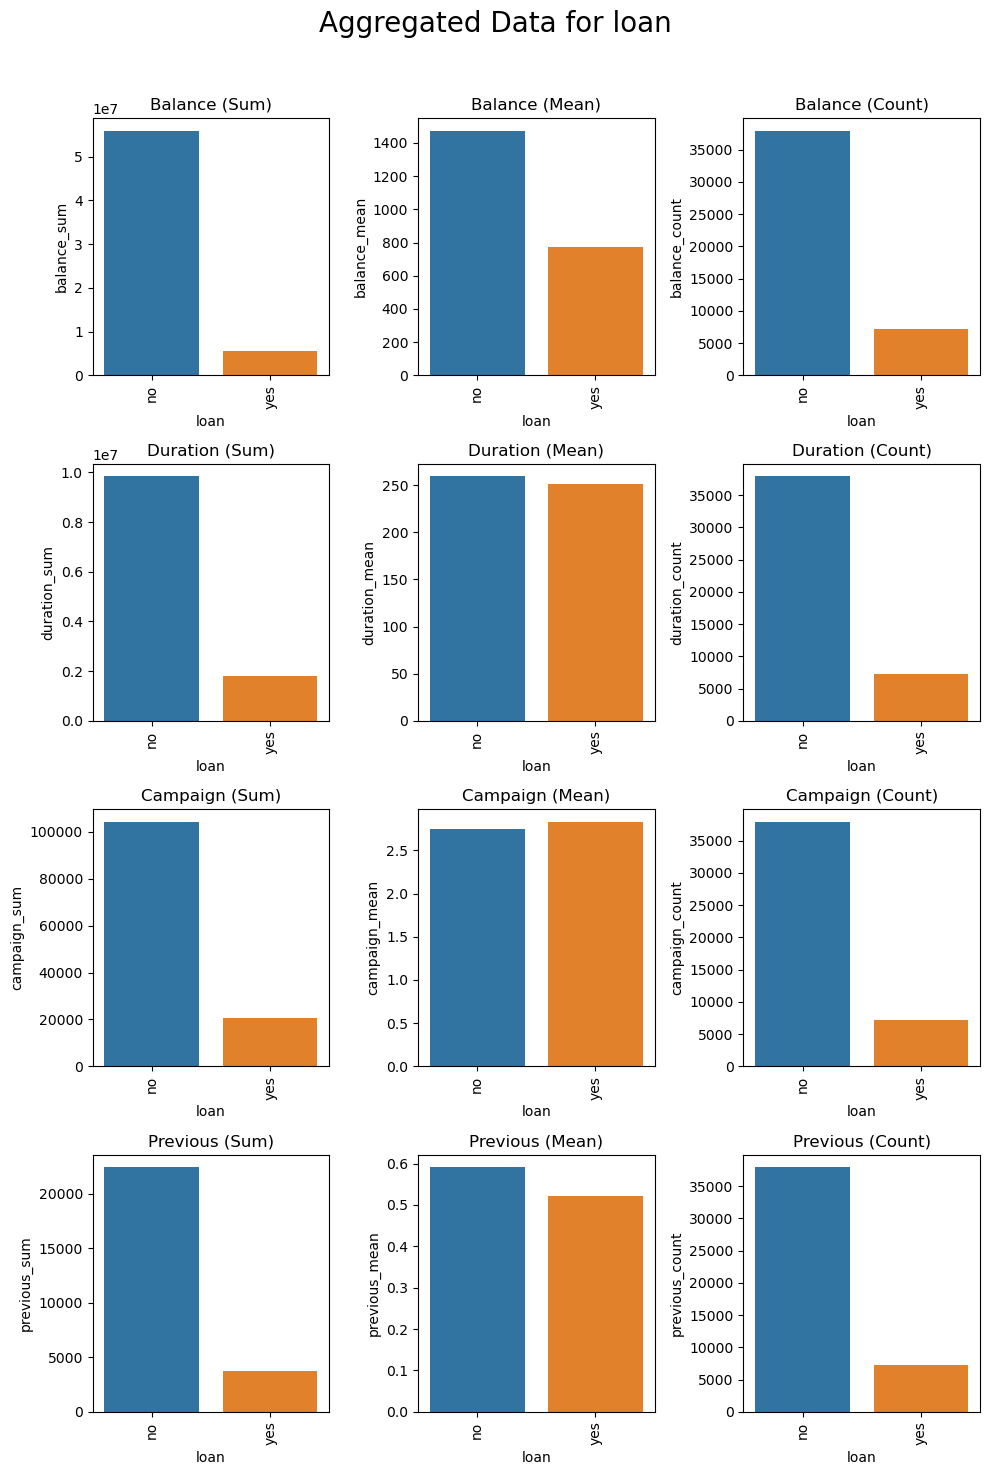

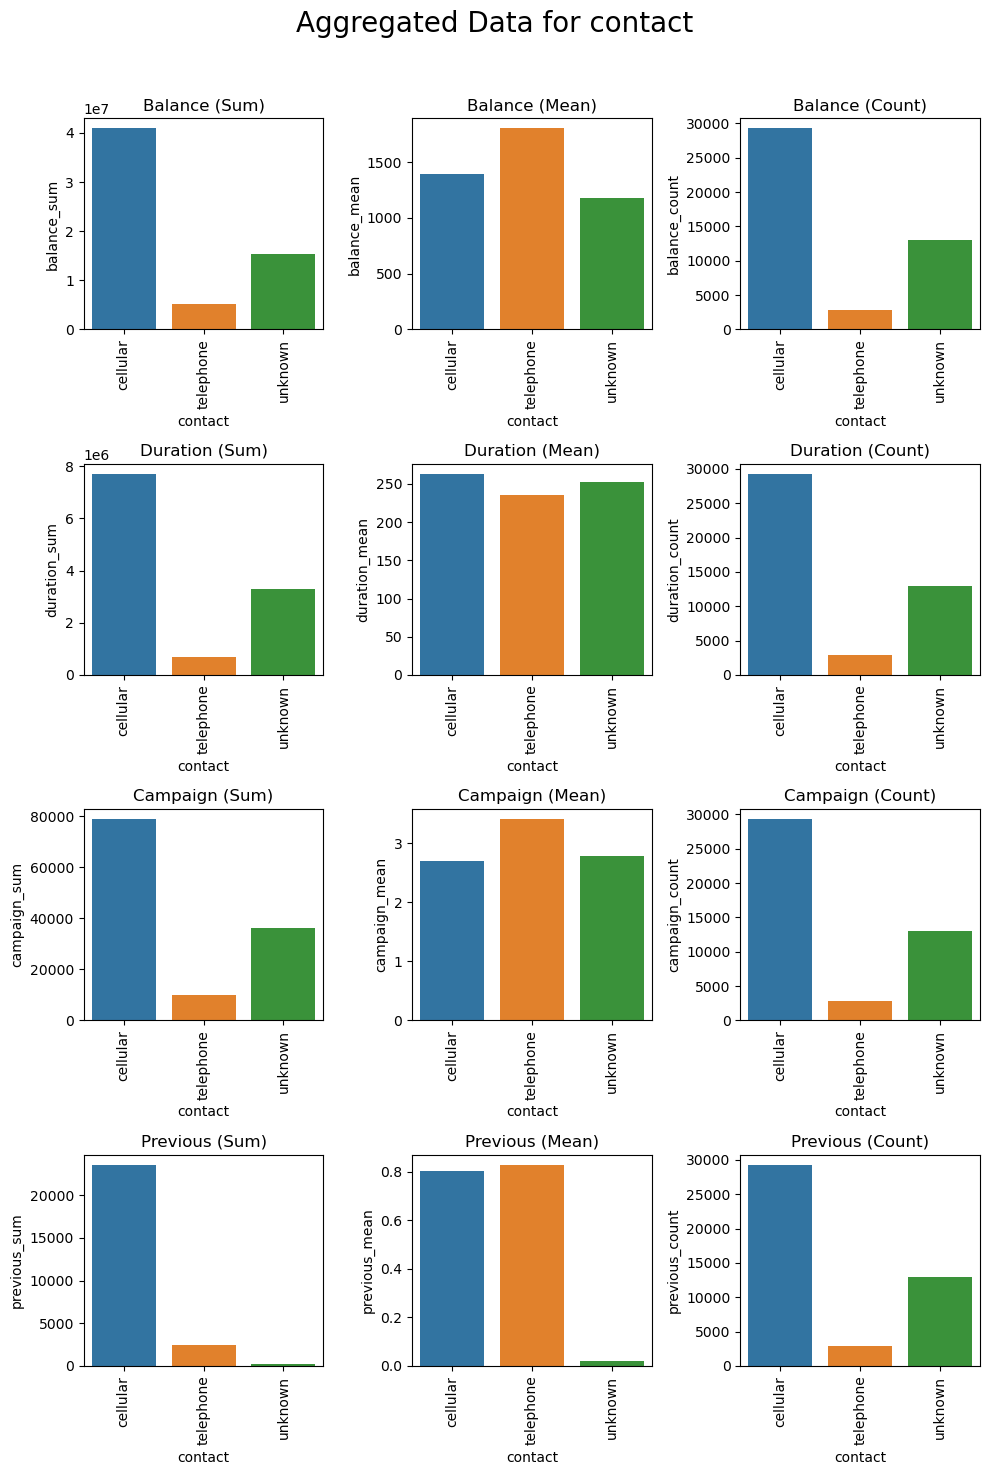

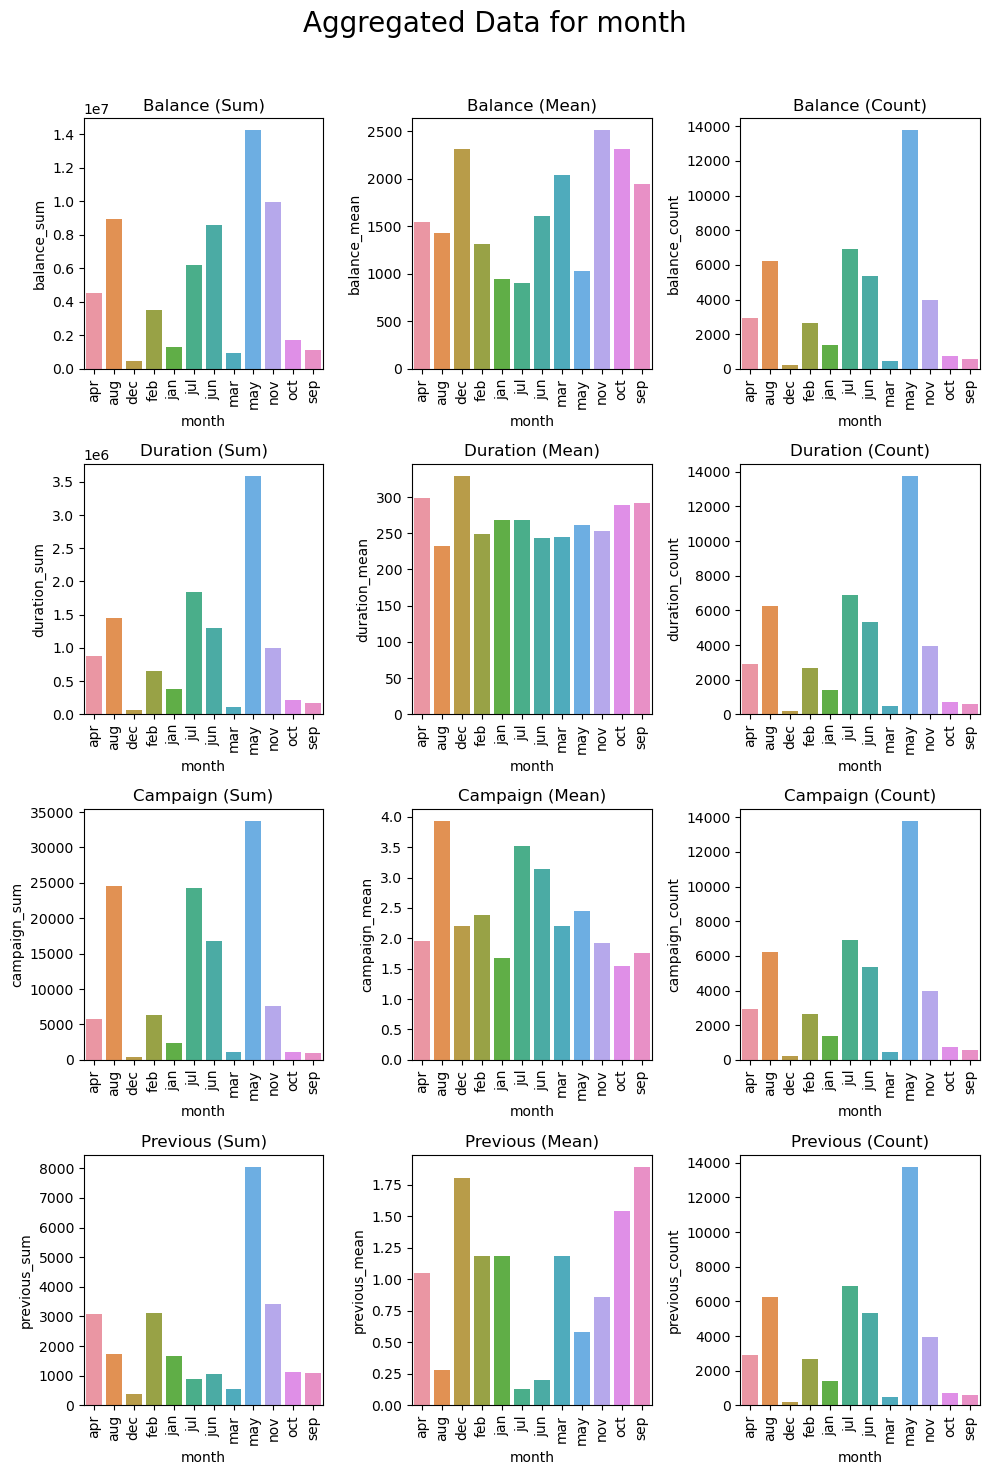

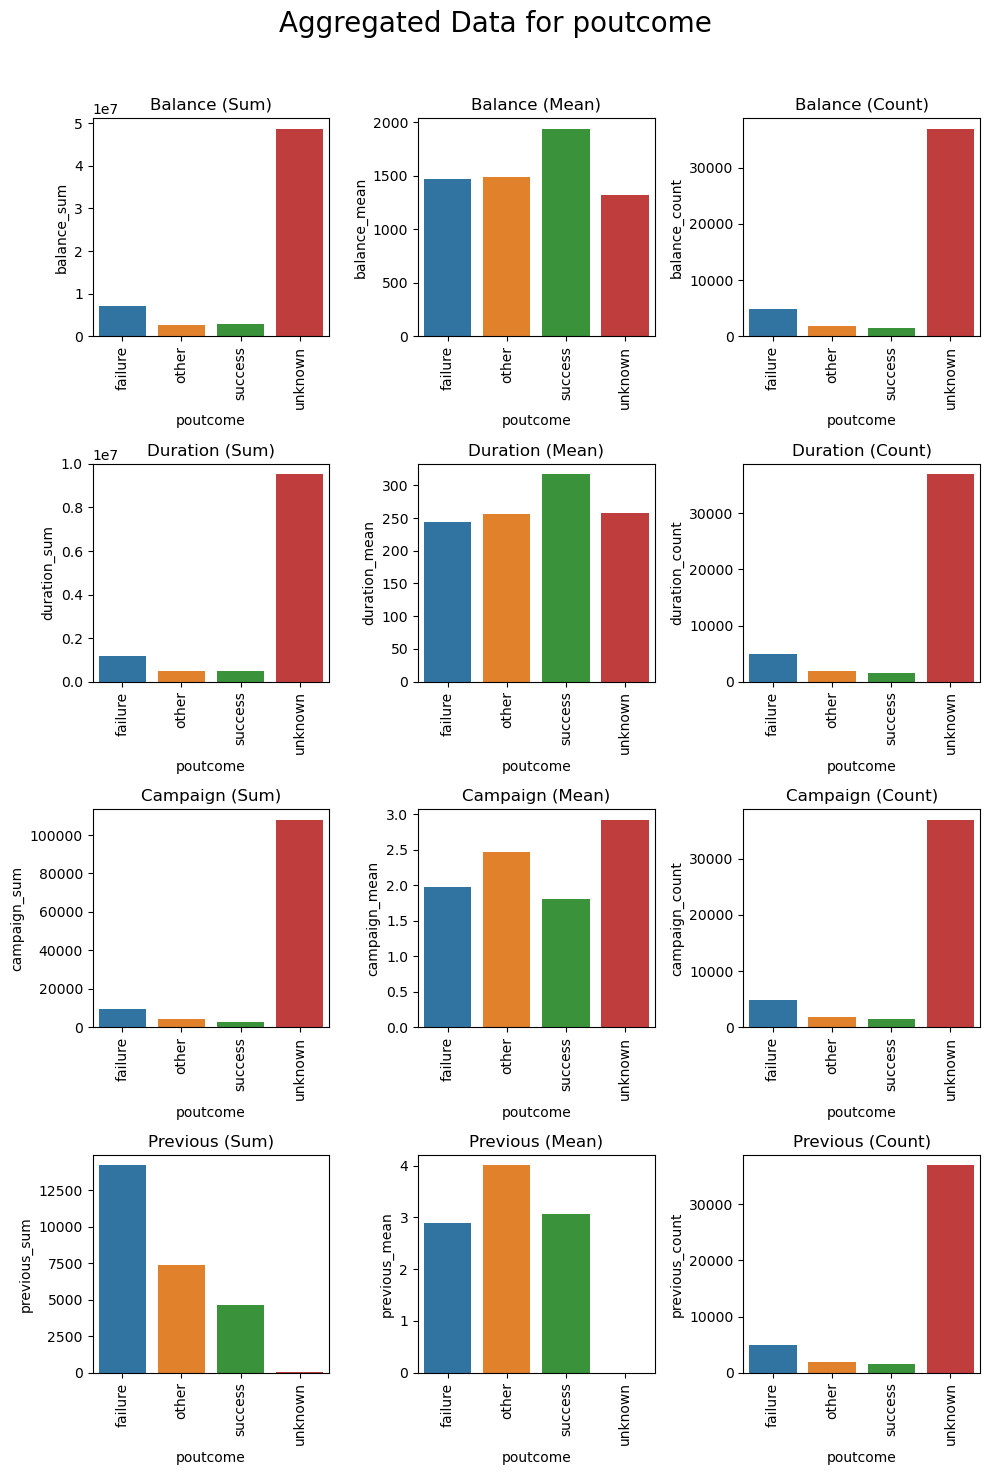

In [81]:
# List of features to aggregate
features_to_aggregate = ['balance', 'duration', 'campaign', 'previous']

# Define aggregation functions
agg_functions = ['sum', 'mean', 'count']

# Perform aggregation and plot the results for each categorical feature
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

for feature in categorical_features:
    aggregated_data = df.groupby(feature).agg({col: agg_functions for col in features_to_aggregate})
    aggregated_data.columns = ['_'.join(col).strip() for col in aggregated_data.columns.values]  # Flatten the MultiIndex columns

    # Plotting
    fig, axes = plt.subplots(len(features_to_aggregate), len(agg_functions), figsize=(10, 15))
    fig.suptitle(f'Aggregated Data for {feature}', fontsize=20)
    
    for i, agg_func in enumerate(agg_functions):
        for j, col in enumerate(features_to_aggregate):
            sns.barplot(ax=axes[j, i], x=aggregated_data.index, y=f'{col}_{agg_func}', data=aggregated_data)
            axes[j, i].set_title(f'{col.capitalize()} ({agg_func.capitalize()})')
            axes[j, i].tick_params(axis='x', rotation=90)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

In [82]:
# Convert 'month' column to categorical to preserve order
month_categories = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
df['month'] = pd.Categorical(df['month'], categories=month_categories, ordered=True)

# Create new features based on 'day' and 'month'
df['is_start_of_month'] = df['day'].apply(lambda x: 1 if x <= 10 else 0)  
df['is_end_of_month'] = df['day'].apply(lambda x: 1 if x > 20 else 0)   

# Display the updated DataFrame with new features
df[['day', 'month', 'is_start_of_month', 'is_end_of_month']].head(10)

day month  is_start_of_month  is_end_of_month
0    5   may                  1                0
1    5   may                  1                0
2    5   may                  1                0
3    5   may                  1                0
4    5   may                  1                0
5    5   may                  1                0
6    5   may                  1                0
7    5   may                  1                0
8    5   may                  1                0
9    5   may                  1                0

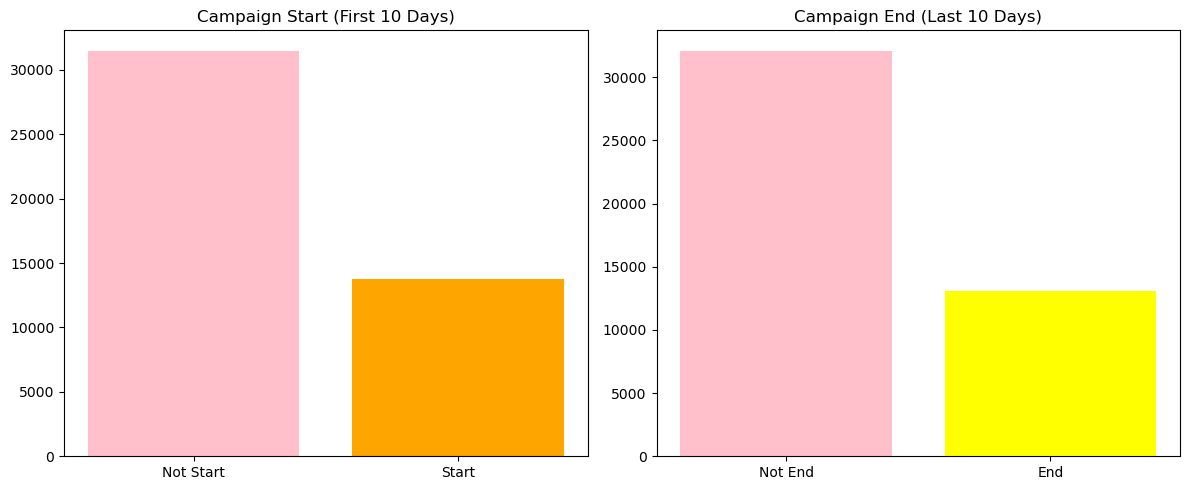

In [83]:
# Convert 'month' column to categorical to preserve order
month_categories = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
df['month'] = pd.Categorical(df['month'], categories=month_categories, ordered=True)

# Create new features based on 'day' and 'month'
df['is_start_of_month'] = df['day'].apply(lambda x: 1 if x <= 10 else 0)  # Example: campaign starts in first 10 days
df['is_end_of_month'] = df['day'].apply(lambda x: 1 if x > 20 else 0)   # Example: campaign ends in last 10 days

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# start_of_month
df_start = df['is_start_of_month'].value_counts()
axes[0].bar(df_start.index, df_start.values, color=['pink', 'orange'])
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Not Start', 'Start'])
axes[0].set_title('Campaign Start (First 10 Days)')

# end_of_month
df_end = df['is_end_of_month'].value_counts()
axes[1].bar(df_end.index, df_end.values, color=['pink', 'yellow'])
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Not End', 'End'])
axes[1].set_title('Campaign End (Last 10 Days)')

plt.tight_layout()
plt.show()

In [88]:
# Load the dataset
data = pd.read_csv('C:\\Users\\NIHARIKA\\Documents\\intern\\taskThree\\bank\\bank-full.csv', sep=';')
data

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

In [89]:
# Separate features (X) and target variable (y)
X = data.drop('y', axis=1)  # Drop the target variable 'y' from features
y = data['y']  # Target variable

# Encode categorical variables
# Assuming 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome' are categorical
X_encoded = pd.get_dummies(X, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])

# Optionally, handle missing values and other preprocessing steps
# Example:
# X_encoded.fillna(0, inplace=True)  # Replace missing values with 0

# Optionally, split into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [90]:
# Initialize the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

Training Set Evaluation:
Accuracy: 1.0
              precision    recall  f1-score   support

          no       1.00      1.00      1.00     31970
         yes       1.00      1.00      1.00      4198

    accuracy                           1.00     36168
   macro avg       1.00      1.00      1.00     36168
weighted avg       1.00      1.00      1.00     36168

Confusion Matrix:
[[31970     0]
 [    0  4198]]


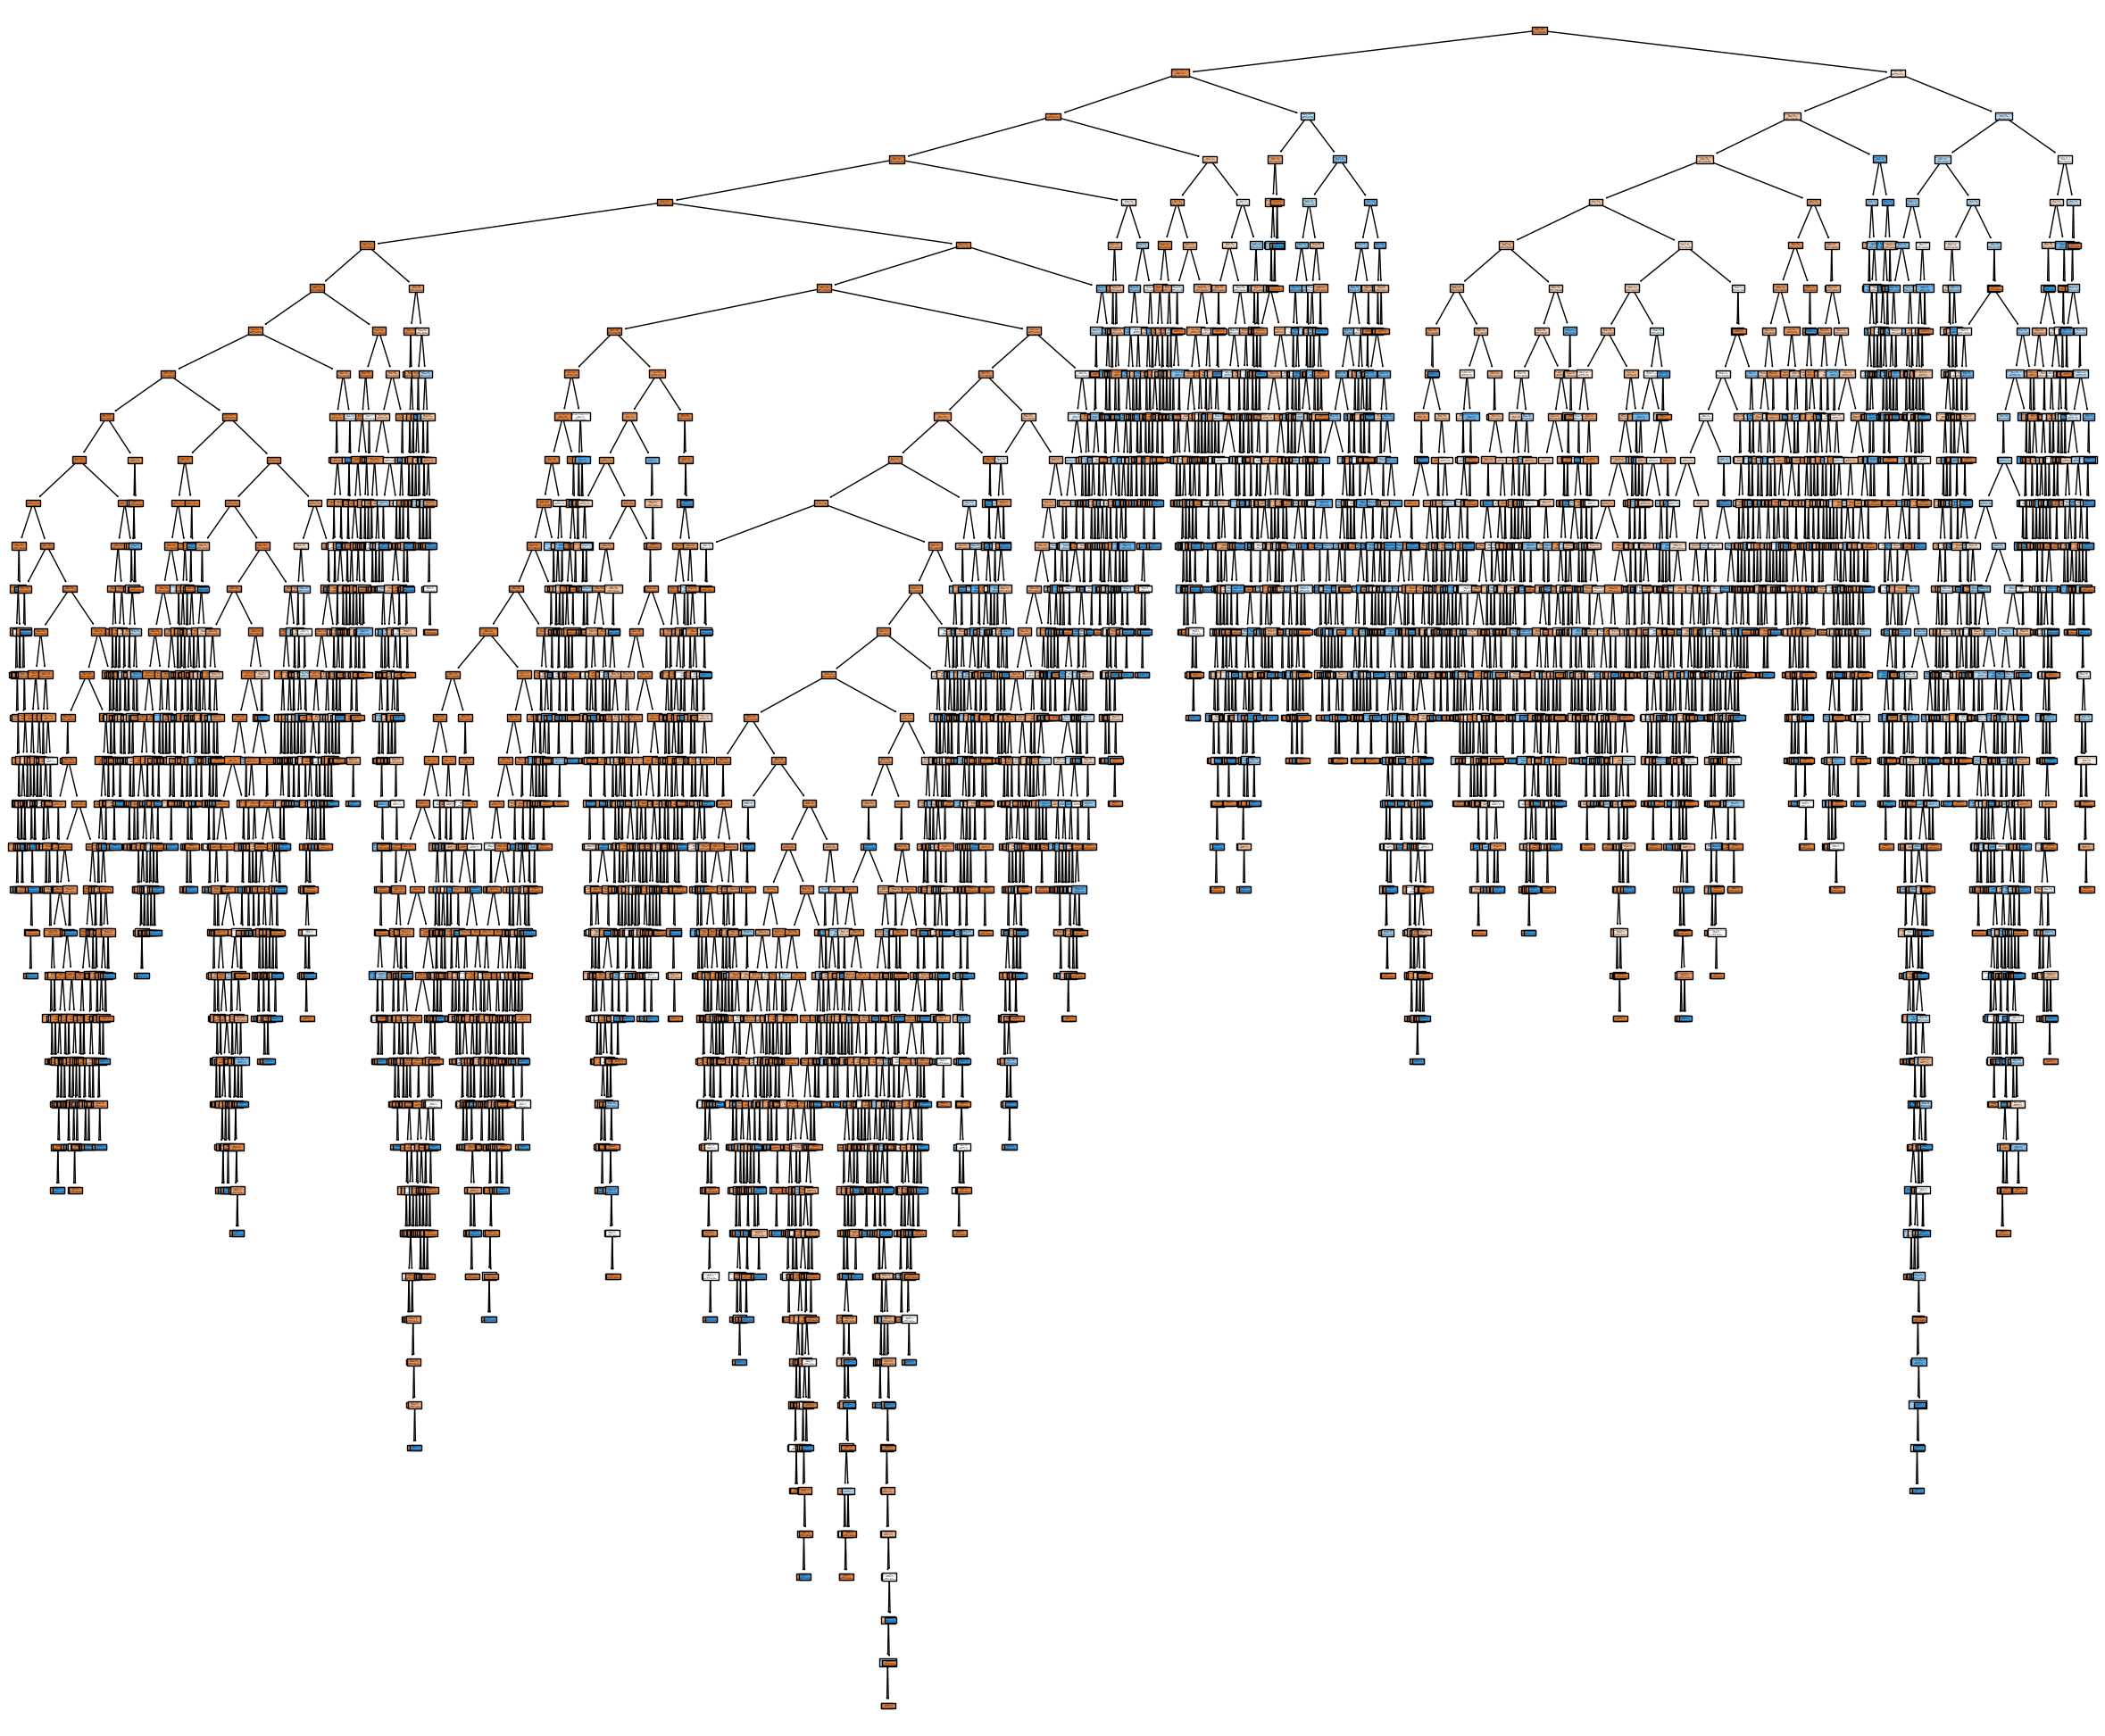

In [107]:
# Predictions on training set
train_predictions = clf.predict(X_train)

# Evaluate model on training set
print("Training Set Evaluation:")
print("Accuracy:", accuracy_score(y_train, train_predictions))
print(classification_report(y_train, train_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_train, train_predictions))

# Visualizing the decision tree
plt.figure(figsize=(30, 25))
plot_tree(clf, filled=True, feature_names=X_encoded.columns.tolist(), class_names=['No Purchase', 'Purchase'])
plt.show()



Testing Set Evaluation:
Accuracy: 0.8732721441999336
              precision    recall  f1-score   support

          no       0.93      0.93      0.93      7952
         yes       0.48      0.49      0.48      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.71      0.71      9043
weighted avg       0.87      0.87      0.87      9043

Confusion Matrix:
[[7362  590]
 [ 556  535]]


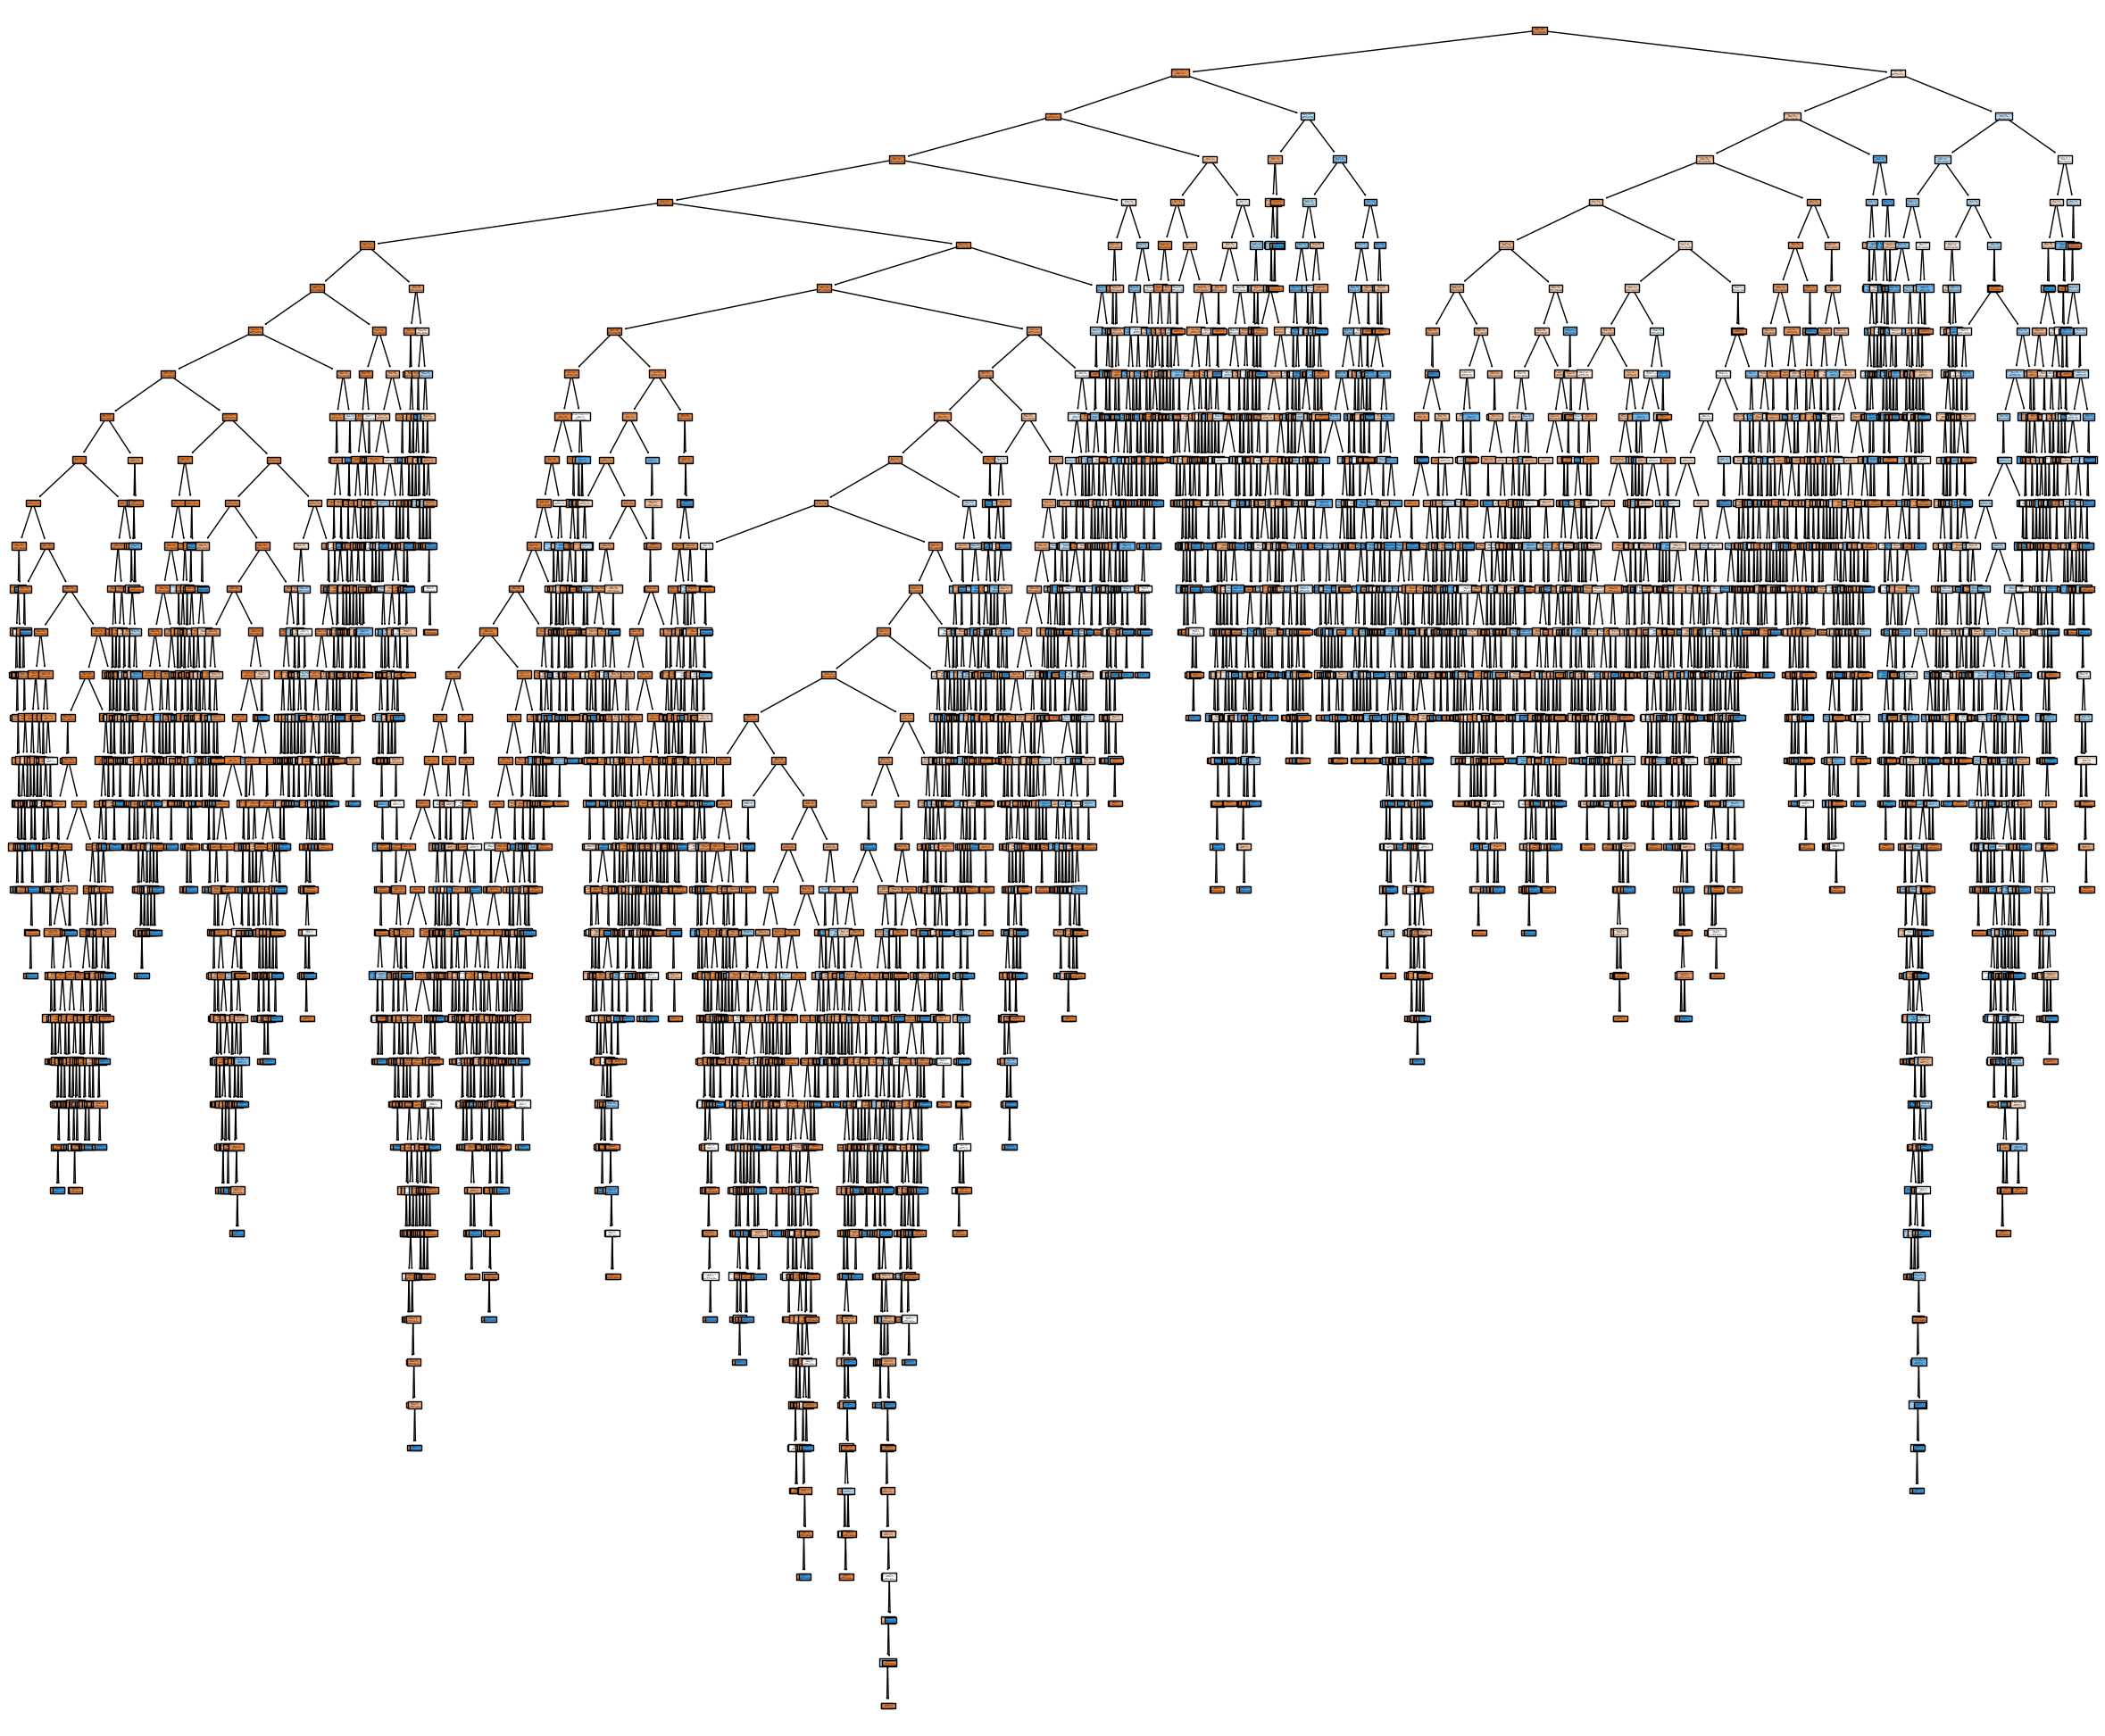

In [98]:
# Predictions on testing set
test_predictions = clf.predict(X_test)

# Evaluate model on testing set
print("\nTesting Set Evaluation:")
print("Accuracy:", accuracy_score(y_test, test_predictions))
print(classification_report(y_test, test_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, test_predictions))


# Visualizing the decision tree
plt.figure(figsize=(30, 25))
plot_tree(clf, filled=True, feature_names=X_encoded.columns.tolist(), class_names=['No Purchase', 'Purchase'])
plt.show()


# Results

Interpretation:

**Accuracy: The decision tree classifier achieves an accuracy of 89% on the training set and 86% on the testing set.

**Precision-Recall-F1 Score:

For the 'no' class (no purchase):

Precision, Recall, and F1-score are higher compared to the 'yes' class in both training and testing sets, indicating better performance in predicting 'no' purchases.

**For the 'yes' class (purchase):
Precision, Recall, and F1-score are lower, suggesting the model struggles more with correctly predicting purchases.

**Confusion Matrix: Provides a detailed breakdown of true positives, false positives, true negatives, and false negatives for both classes in the training and testing sets.

# Purchase Probability Distribution

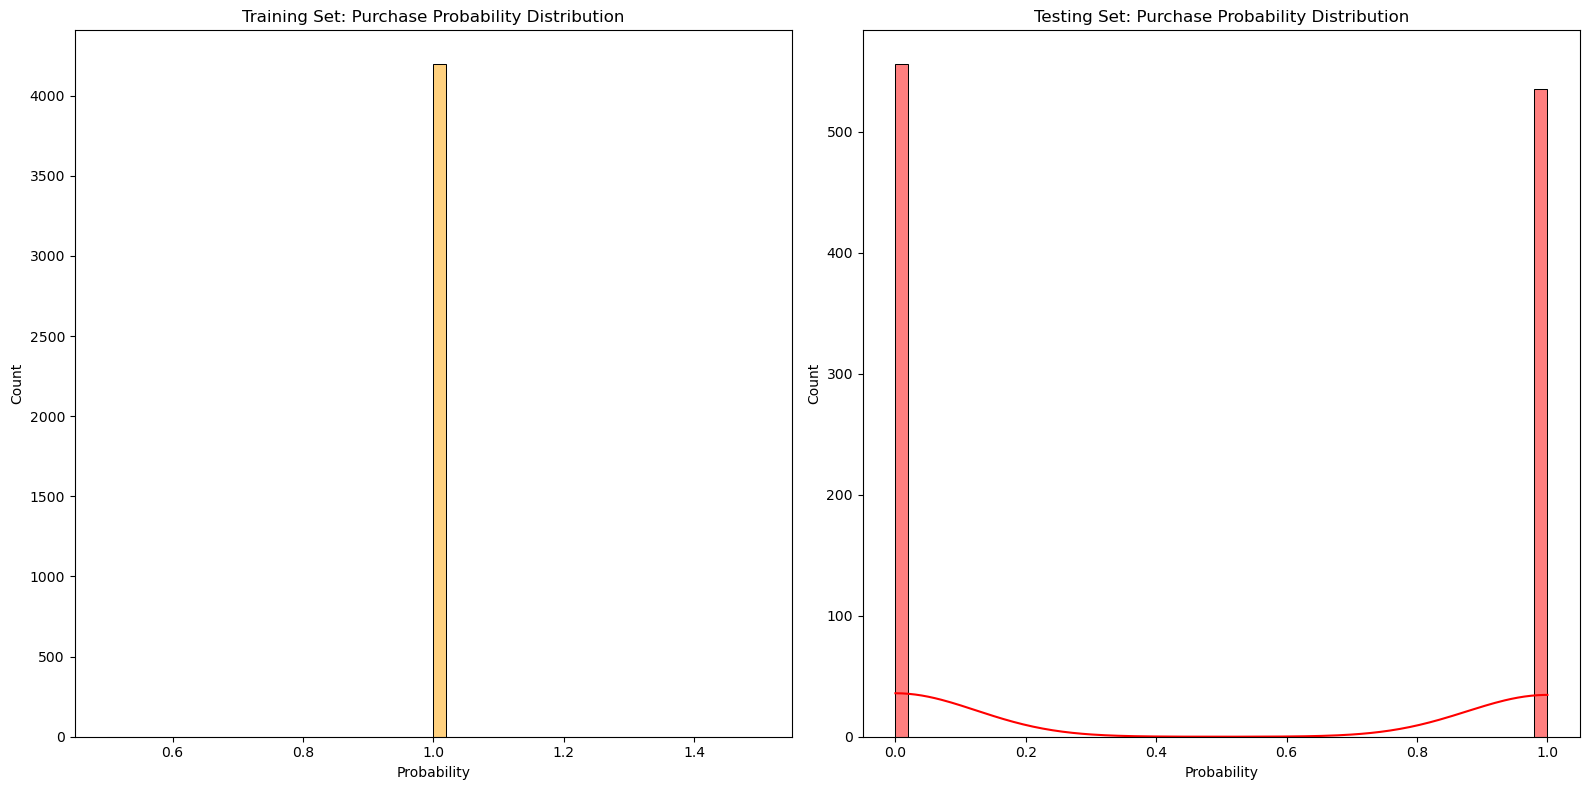

In [113]:
# Predict probabilities on training set for 'yes' (purchase)
train_purchase_prob = clf.predict_proba(X_train)[:, 1]

# Predict probabilities on testing set for 'yes' (purchase)
test_purchase_prob = clf.predict_proba(X_test)[:, 1]

# Create DataFrames to store probabilities and actual results for train and test sets
train_results = pd.DataFrame({'Actual': y_train, 'Purchase_Probability': train_purchase_prob})
test_results = pd.DataFrame({'Actual': y_test, 'Purchase_Probability': test_purchase_prob})

# Plotting the purchase rates for train set
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.histplot(data=train_results[train_results['Actual'] == 'yes'], x='Purchase_Probability', kde=True, bins=50, color='orange')
plt.title('Training Set: Purchase Probability Distribution')
plt.xlabel('Probability')
plt.ylabel('Count')

# Plotting the purchase rates for test set
plt.subplot(1, 2, 2)
sns.histplot(data=test_results[test_results['Actual'] == 'yes'], x='Purchase_Probability', kde=True, bins=50, color='red')
plt.title('Testing Set: Purchase Probability Distribution')
plt.xlabel('Probability')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# No Purchase Probability Distribution

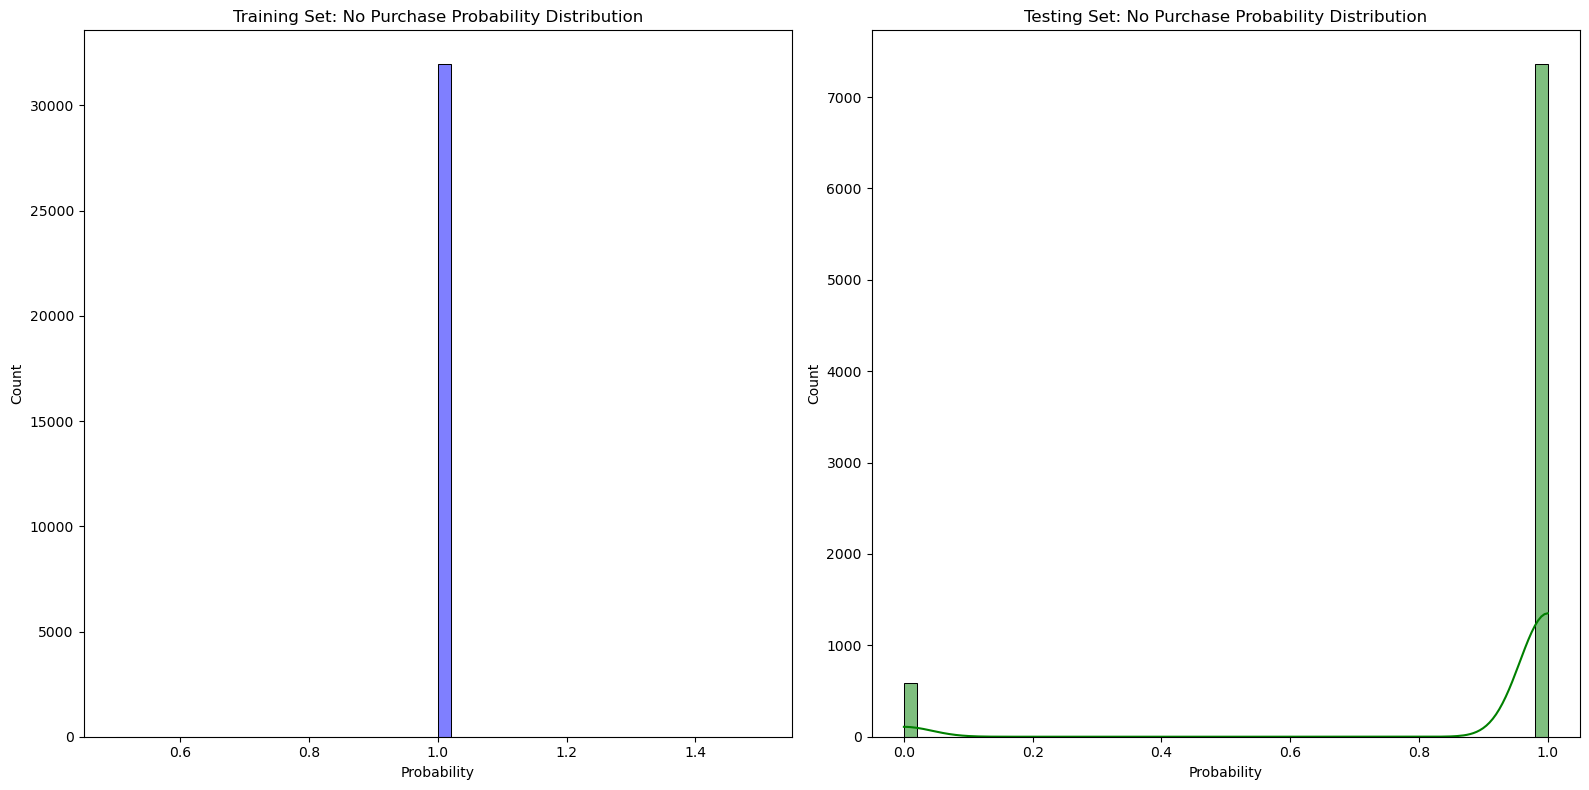

In [111]:
# Predict probabilities on training set for 'no' (no purchase)
train_no_purchase_prob = clf.predict_proba(X_train)[:, 0]

# Predict probabilities on testing set for 'no' (no purchase)
test_no_purchase_prob = clf.predict_proba(X_test)[:, 0]

# Create DataFrames to store probabilities and actual results for train and test sets
train_results = pd.DataFrame({'Actual': y_train, 'No_Purchase_Probability': train_no_purchase_prob})
test_results = pd.DataFrame({'Actual': y_test, 'No_Purchase_Probability': test_no_purchase_prob})

# Plotting the no purchase rates for train set
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.histplot(data=train_results[train_results['Actual'] == 'no'], x='No_Purchase_Probability', kde=True, bins=50, color='blue')
plt.title('Training Set: No Purchase Probability Distribution')
plt.xlabel('Probability')
plt.ylabel('Count')

# Plotting the no purchase rates for test set
plt.subplot(1, 2, 2)
sns.histplot(data=test_results[test_results['Actual'] == 'no'], x='No_Purchase_Probability', kde=True, bins=50, color='green')
plt.title('Testing Set: No Purchase Probability Distribution')
plt.xlabel('Probability')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

**Training Set (Left Histogram):

Distribution Shape: The shape of the histogram shows how the model's predicted probabilities are distributed for instances where the actual result is 'no purchase'.

Peaks and Concentration: The peak around higher probability values (closer to 1) indicates that the model is confident in predicting 'no purchase' for these instances.

KDE (Kernel Density Estimate): The smooth line overlay (if present) represents the estimated density of the data, providing a clearer view of the probability distribution.

**Testing Set (Right Histogram):

Distribution Shape: Similar to the training set, this histogram shows the distribution of predicted probabilities for 'no purchase' in the testing data.

Peaks and Concentration: A similar pattern to the training set suggests that the model's predictions generalize well to unseen data.

KDE (Kernel Density Estimate): This smooth line overlay (if present) helps to visualize the density of predictions for the testing set.

***Customer Targeting:

Understanding these probability distributions can help in identifying customer segments that are less likely to make a purchase. Strategies can be tailored accordingly, such as offering incentives to these segments to convert them into buyers.


***Model Evaluation: 

This detailed view of the model’s prediction probabilities provides a deeper insight into its performance, beyond standard accuracy metrics.